#**Thinking with Deep Learning: Week 2 Homework Modules**


- __Instructor:__ James Evans

- __Notebook Author & TAs:__ Bhargav Srinivasa Desikan, Shiyang, Avi


__Perform 3 out of this week's following 4 modules:__

##1. [**Basic Feedforward Neural Network Variations**](https://colab.research.google.com/github/KnowledgeLab/Thinking-With-Deep-Learning-2025/blob/main/Tutorials-Homework_Notebooks/Week%202/Week_2_2025.ipynb#scrollTo=_yrDxW32Fyqg)

### **Summary:** Feed Forward networks or Multi-layer perceptrons (MLPs) are simple neural networks where each neuron in a layer connects to every neuron in the subsequent layer. For classification tasks, the output layer's size corresponds to the number of classes and often uses a softmax function to generate probability distributions. For regression tasks, the network typically uses linear or ReLU activation functions to output a single real number prediction. We explore this basic architecture and variations with data.

### **Tasks/Questions:**

**1)** Build a neural network model implemented in this notebook for a dataset of your choice. You can use the model to perform a predictive task, such as classification or numerical prediction.

**2)** Use this model to extract features from your data-points. Once you extract these features, convert these to a low dimensional space and visualise them (e.g PCA, t-SNE, UMAP).

##2. [**Optimizing Neural Networks**](https://colab.research.google.com/github/KnowledgeLab/Thinking-With-Deep-Learning-2025/blob/main/Tutorials-Homework_Notebooks/Week%202/Week_2_2025.ipynb#scrollTo=9smLXu7gjd2y)

### **Summary:** Neural networks are optimized through an iterative process of adjusting their weights to improve the accuracy of predictions and classifications. The primary goal during optimization is to minimize the error between the network's predictions and the actual target values. This process relies on various techniques and algorithms to systematically update the weights based on how well the network is performing.

### **Tasks/Questions:**

**1)** Build or reuse an older model you have built, and use 3 different optimization techniques or methods on the model.

**2)** Which optimizer performed the best? How did each method effect your model performance on in-sample training data and out-of-sample test data?

##3. [**Regularizing Neural Networks**](https://colab.research.google.com/github/KnowledgeLab/Thinking-With-Deep-Learning-2025/blob/main/Tutorials-Homework_Notebooks/Week%202/Week_2_2025.ipynb#scrollTo=M4CEq6DLjd3B&line=1&uniqifier=1)

### **Summary:** Regularizing neural networks involves implementing techniques to prevent overfitting and improve the model's ability to generalize to new data. These techniques help ensure the network learns meaningful patterns rather than memorizing the training data, ultimately leading to better performance on unseen examples.

### **Tasks/Questions:**

**1)** Build or reuse an older model you have built, and use 3 different regularization approaches on the model.

**2)** Which regularization approach performed the best? How did each effect your model performance on out-of-sample test data?

##4. [**Fine-tuning Neural Networks**](https://colab.research.google.com/github/KnowledgeLab/Thinking-With-Deep-Learning-2025/blob/main/Tutorials-Homework_Notebooks/Week%202/Week_2_2025.ipynb#scrollTo=8DVd5yiyCMsN)

### **Summary:**Fine-tuning neural networks involves taking a pre-trained model and adjusting its parameters allowing it to perform well on a specific task or dataset. This process sometimes involves (1) retraining all model weights, (2) unfreezing selected layers of the network and training them with a low learning rate on the new data, while keeping other layers frozen to preserve useful features learned during initial training, or (3) building adapators that translate the model weights through low-rank approaches, the purpose of this section. Fine-tuning is particularly valuable when working with limited data or computational resources, as it leverages knowledge transferred from the pre-trained model while allowing adaptation to the target task.

### **Tasks/Questions:**
**1)**Adapt an LLM (e.g., Galactical used above) with LoRA to your text and evaluate its perplexity before and after adaptation.

**2)**QLoRA: Load a 4-bit quantized model (via bitsandbytes), apply LoRA, and fine-tune. Compare GPU memory usage, speed, and resulting perplexity with the standard LoRA approach above.

**3)**Hyperparameter Tuning: Adjust r, lora_alpha, lora_dropout, or the learning rate.

**4)**Regularization: Introduce weight decay, dropout in LoRA layers, or regularization of adapter weights.




In [ ]:
# @markdown Mark the Modules you completed
Basic Feedforward Neural Network Variations = False  # @param {type:"boolean"}
Optimizing Neural Networks = False  # @param {type:"boolean"}
Regularizing Neural Networks = False  # @param {type:"boolean"}
Fine-tuning Neural Networks = False  # @param {type:"boolean"}

## Module 1: Basic Feedforward Neural Network Variations

**Summary: Feed Forward networks or Multi-layer perceptrons (MLPs) are simple neural networks where each neuron in a layer connects to every neuron in the subsequent layer. For classification tasks, the output layer's size corresponds to the number of classes and often uses a softmax function to generate probability distributions. For regression tasks, the network typically uses linear or ReLU activation functions to output a single real number prediction. We explore this basic architecture and variations with data.**

We saw these back in Notebook 1. Adding multiple layers, we have fully-connected,  feed-forward NNs, where the output of each neuron in the layer above is directed to every neuron in the layer below. The number of neurons in the input layer is the same as the size of the data. The size of the output layer is set to the number of classes and often provides a probability distribution over the classes by passing the neurons through a softmax function. In a regression setting, the activation function is often a simple linear function or ReLU, and the prediction is a real number instead of a probability distribution and class.

In the code below, we create a single layer network in PyTorch, as well as scikit-learn. We do not train these models (refer to [Tut 1.2](https://colab.research.google.com/drive/18NT8eyzhlDN9h-lb6svRsbxJ6r3tPNRU?usp=sharing) for basic training).



In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(200, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define sigmoid activation and softmax output
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [ ]:
net = Network()

In [ ]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

In [ ]:
criterion = nn.BCELoss()

#### scikit-learn

This is just to show a comparison, as the simplest neural network model. Scikit-learn focuses on machine learning and not deep learning, but the multi-layer perceptron is included as a basic model.

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(200, ), activation='relu')

## Deep Neural Models

Another network you have already seen in the last chapter, a deep feed forward network is one where we have (usually) more than 2 layers of nodes which are fully connected. The crucial distinction here is that while a shallow network could get away with not needing to backpropagate values through the network, a deep network must crucially be able to do this. It is with the Stochastic Gradient Descent powered backpropagation of values that we are able to change our weights and make DNNs useful, and since then, different kinds of DNNs have been the state of the art.

The last time we saw deep neural models, we added a single layer to our shallow network (refer to [tut 1.2](https://colab.research.google.com/github/KnowledgeLab/thinking_with_deep_learning2025/blob/main/Tutorials-Homework_Notebooks/Week%201/Tutorial_2_Intro_NNs.ipynb).)

**IMPORTANT NOTE**: this sort of model includes many new topics, so you may not understand every aspect of this model right away. What is important to get from this example, however, is the kind of data we are feeding into the model, the parameters of the model, and the task. In this case, the setting is diverse dataset of forest cover type, using both numerical features and categorical features, and predicting a label over multiple classes. You will often find such scenarios in social sciences datasets, such as census data. Notice the way the data is set up, and the parts of the neural network - the loss function, activation functions, optimisers, and so on.

This example demonstrates how to do structured data classification using the
two modeling
techniques. It is highly recommended to skim these two articles before diving in! The description below the model is the abstract.

1. [Wide & Deep](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html) models

- The human brain is a sophisticated learning machine, forming rules by memorizing everyday events (“sparrows can fly” and “pigeons can fly”) and generalizing those learnings to apply to things we haven't seen before (“animals with wings can fly”). Perhaps more powerfully, memorization also allows us to further refine our generalized rules with exceptions (“penguins can't fly”). As we were exploring how to advance machine intelligence, we asked ourselves the question—can we teach computers to learn like humans do, by combining the power of memorization and generalization? It's not an easy question to answer, but by jointly training a wide linear model (for memorization) alongside a deep neural network (for generalization), one can combine the strengths of both to bring us one step closer. At Google, we call it Wide & Deep Learning. It's useful for generic large-scale regression and classification problems with sparse inputs (categorical features with a large number of possible feature values), such as recommender systems, search, and ranking problems.

2. [Deep & Cross](https://arxiv.org/abs/1708.05123) models -

- Feature engineering has been the key to the success of many prediction models. However, the process is nontrivial and often requires manual feature engineering or exhaustive searching. DNNs
are able to automatically learn feature interactions; however, they
generate all interactions implicitly, and are not necessarily efficient in learning all types of cross features. In this paper, we propose the Deep & Cross Network (DCN) which keeps the benefits of
a DNN model, and beyond that, it introduces a novel cross network
more efficient in learning certain bounded-degree feature
interactions. In particular, DCN explicitly applies feature crossing
at each layer, requires no manual feature engineering, and adds
negligible extra complexity to the DNN model. Our experimental
results have demonstrated its superiority over the state-of-art algorithms on the CTR prediction dataset and dense classification
dataset, in terms of both model accuracy and memory usage.


### The dataset

This example uses the [Covertype](https://archive.ics.uci.edu/ml/datasets/covertype) dataset from the UCI
Machine Learning Repository. The task is to predict forest cover type from cartographic variables.
The dataset includes 506,011 instances with 12 input features: 10 numerical features and 2
categorical features. Each instance is categorized into 1 of 7 classes, and is **multilabel classification task**. Even though the dataset isn't social scientific, it combines both numerical values and categorical features, which is something you might be dealing with often.

In [ ]:
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

### Prepare the data

First, let's load the dataset from the UCI Machine Learning Repository into a Pandas
DataFrame:

In [ ]:
# Load and preprocess the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
raw_data = pd.read_csv(data_url, header=None)
print(f"Dataset shape: {raw_data.shape}")
raw_data.head()

The two categorical features in the dataset are binary-encoded.
We will convert this dataset representation to the typical representation, where each
categorical feature is represented as a single integer value.

In [ ]:
soil_type_values = [f"soil_type_{idx+1}" for idx in range(40)]
wilderness_area_values = [f"area_type_{idx+1}" for idx in range(4)]

soil_type = raw_data.loc[:, 14:53].apply(
    lambda x: soil_type_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)
wilderness_area = raw_data.loc[:, 10:13].apply(
    lambda x: wilderness_area_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)

CSV_HEADER = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area",
    "Soil_Type",
    "Cover_Type",
]

data = pd.concat(
    [raw_data.loc[:, 0:9], wilderness_area, soil_type, raw_data.loc[:, 54]],
    axis=1,
    ignore_index=True,
)
data.columns = CSV_HEADER

# Convert the target label indices into a range from 0 to 6 (there are 7 labels in total).
data["Cover_Type"] = data["Cover_Type"] - 1

print(f"Dataset shape: {data.shape}")
data.head().T

The shape of the DataFrame shows there are 13 columns per sample
(12 for the features and 1 for the target label).

Let's split the data into training (85%) and test (15%) sets.

In [ ]:
train_splits = []
test_splits = []

for _, group_data in data.groupby("Cover_Type"):
    random_selection = np.random.rand(len(group_data.index)) <= 0.85
    train_splits.append(group_data[random_selection])
    test_splits.append(group_data[~random_selection])

train_data = pd.concat(train_splits).sample(frac=1).reset_index(drop=True)
test_data = pd.concat(test_splits).sample(frac=1).reset_index(drop=True)

print(f"Train split size: {len(train_data.index)}")
print(f"Test split size: {len(test_data.index)}")

Next, store the training and test data in separate CSV files.

In [ ]:
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"

train_data.to_csv(train_data_file, index=False)
test_data.to_csv(test_data_file, index=False)

### Define dataset metadata

Here, we define the metadata of the dataset that will be useful for reading and parsing
the data into input features, and encoding the input features with respect to their types.

In [ ]:
TARGET_FEATURE_NAME = "Cover_Type"

TARGET_FEATURE_LABELS = ["0", "1", "2", "3", "4", "5", "6"]

NUMERIC_FEATURE_NAMES = [
    "Aspect",
    "Elevation",
    "Hillshade_3pm",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Slope",
    "Vertical_Distance_To_Hydrology",
]

CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "Soil_Type": list(data["Soil_Type"].unique()),
    "Wilderness_Area": list(data["Wilderness_Area"].unique()),
}

CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())

FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

COLUMN_DEFAULTS = [
    [0] if feature_name in NUMERIC_FEATURE_NAMES + [TARGET_FEATURE_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

NUM_CLASSES = len(TARGET_FEATURE_LABELS)

### Experiment setup

Here we organize and store the processed data in a way that PyTorch can easily use and further preprocesses the data by converting categorical features and labels into numerical representations using LabelEncoder.

In [ ]:
class ForestDataset(Dataset):
    def __init__(self, dataframe, numeric_features, categorical_features):
        self.numeric_data = dataframe[numeric_features].values.astype(np.float32)
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(dataframe["Cover_Type"].values)
        self.cat_encoders = {
            feature: LabelEncoder().fit(dataframe[feature])
            for feature in categorical_features
        }
        self.categorical_data = [
            self.cat_encoders[feature].transform(dataframe[feature])
            for feature in categorical_features
        ]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        numeric = torch.tensor(self.numeric_data[idx], dtype=torch.float32)
        categorical = torch.tensor([self.categorical_data[i][idx] for i in range(len(self.categorical_data))], dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return numeric, categorical, label

In [ ]:
# Data preparation
train_dataset = ForestDataset(train_data, NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES)
test_dataset = ForestDataset(test_data, NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES)

batch_size = 265
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

### Experiment 1: a baseline model

In the first experiment, let's create a multi-layer feed-forward network,
where the categorical features are one-hot encoded.

**Note**: Some new terms here! We see a Batch Normalisation layer. We will encounter these in our second notebook on regularisation, but for a brief explanation:

Batch normalization tries to reduce the “internal covariate shift” between training and testing data. Internal covariate shift is the change in the distribution of network activations due to the change in paramaters during training. In neural networks, the output of the first layer feeds into the second layer, the output of the second layer feeds into the third, and so on. When the parameters of a layer change, so does the distribution of inputs to subsequent layers. These shifts in input distributions can be problematic for neural networks, especially deep neural networks that could have a large number of layers. Batch normalization tries to mitigate this. You can check out [this](https://arxiv.org/abs/1502.03167) paper where the idea of mitigating internal covariance shift with batch normalization was first introduced.

We also see Dropout, another term from the regularisation universe. Dropout involves injecting noise while computing each internal layer during forward propagation. The method is called dropout because we literally drop out some neurons during training. Throughout training, on each iteration, standard dropout consists of zeroing out some fraction of the nodes in each layer before calculating the subsequent layer.

![Dropout](https://d2l.ai/_images/dropout2.svg)


In [ ]:
# Model definition
class BaselineModel(nn.Module):
    def __init__(self, num_numeric_features, categorical_cardinalities, hidden_units, num_classes, dropout_rate):
        super(BaselineModel, self).__init__()
        self.cat_embeddings = nn.ModuleList(
            [nn.Embedding(cardinality, int(math.sqrt(cardinality))) for cardinality in categorical_cardinalities]
        )
        input_dim = num_numeric_features + sum(emb.embedding_dim for emb in self.cat_embeddings)
        self.hidden_layers = nn.ModuleList(
            [nn.Linear(input_dim if i == 0 else hidden_units[i-1], hidden_units[i]) for i in range(len(hidden_units))]
        )
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(units) for units in hidden_units])
        self.dropout = nn.Dropout(dropout_rate)
        self.output_layer = nn.Linear(hidden_units[-1], num_classes)

    def forward(self, numeric_inputs, categorical_inputs):
        embedded_cats = [emb(cat) for emb, cat in zip(self.cat_embeddings, categorical_inputs.T)]
        features = torch.cat([numeric_inputs] + embedded_cats, dim=1)
        for layer, bn in zip(self.hidden_layers, self.batch_norms):
            features = self.dropout(torch.relu(bn(layer(features))))
        return torch.softmax(self.output_layer(features), dim=1)

num_classes = len(data["Cover_Type"].unique())
categorical_cardinalities = [len(train_dataset.cat_encoders[feature].classes_) for feature in CATEGORICAL_FEATURE_NAMES]

model = BaselineModel(
    num_numeric_features=len(NUMERIC_FEATURE_NAMES),
    categorical_cardinalities=categorical_cardinalities,
    hidden_units=[32, 32],
    num_classes=num_classes,
    dropout_rate=0.1
)

Setting up for Training


In [ ]:
# Training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, dataloader, optimizer, criterion, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for numeric, categorical, labels in dataloader:
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(numeric, categorical)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader):.4f}")

The Evaluation Function

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for numeric, categorical, labels in dataloader:
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)
            outputs = model(numeric, categorical)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

train_model(model, train_loader, optimizer, criterion, num_epochs=50)
evaluate_model(model, test_loader)

Epoch 1/50, Loss: 1.4863
Epoch 2/50, Loss: 1.4445
Epoch 3/50, Loss: 1.4371
Epoch 4/50, Loss: 1.4326
Epoch 5/50, Loss: 1.4293
Epoch 6/50, Loss: 1.4269
Epoch 7/50, Loss: 1.4253
Epoch 8/50, Loss: 1.4236
Epoch 9/50, Loss: 1.4223
Epoch 10/50, Loss: 1.4210
Epoch 11/50, Loss: 1.4203
Epoch 12/50, Loss: 1.4191
Epoch 13/50, Loss: 1.4187
Epoch 14/50, Loss: 1.4176
Epoch 15/50, Loss: 1.4166
Epoch 16/50, Loss: 1.4156
Epoch 17/50, Loss: 1.4152
Epoch 18/50, Loss: 1.4139
Epoch 19/50, Loss: 1.4136
Epoch 20/50, Loss: 1.4137
Epoch 21/50, Loss: 1.4127
Epoch 22/50, Loss: 1.4122
Epoch 23/50, Loss: 1.4121
Epoch 24/50, Loss: 1.4117
Epoch 25/50, Loss: 1.4115
Epoch 26/50, Loss: 1.4108
Epoch 27/50, Loss: 1.4107
Epoch 28/50, Loss: 1.4100
Epoch 29/50, Loss: 1.4095
Epoch 30/50, Loss: 1.4096
Epoch 31/50, Loss: 1.4091
Epoch 32/50, Loss: 1.4091
Epoch 33/50, Loss: 1.4088
Epoch 34/50, Loss: 1.4083
Epoch 35/50, Loss: 1.4087
Epoch 36/50, Loss: 1.4082
Epoch 37/50, Loss: 1.4080
Epoch 38/50, Loss: 1.4074
Epoch 39/50, Loss: 1.

The baseline linear model achieves ~75% test accuracy.

### Experiment 2: Wide & Deep model

In the second experiment, we create a Wide & Deep model. The wide part of the model
a linear model, while the deep part of the model is a multi-layer feed-forward network.

Use the sparse representation of the input features in the wide part of the model and the
dense representation of the input features for the deep part of the model.

Note that every input features contributes to both parts of the model with different
representations. You can see that we merge the layers near the end before reaching the output of the model.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Helper function for embedding layers
def create_embeddings(categorical_cardinalities):
    return nn.ModuleList(
        [nn.Embedding(cardinality, int(math.sqrt(cardinality))) for cardinality in categorical_cardinalities]
    )

# Wide and Deep Model
class WideAndDeepModel(nn.Module):
    def __init__(self, num_numeric_features, categorical_cardinalities, hidden_units, num_classes, dropout_rate):
        super(WideAndDeepModel, self).__init__()

        # Wide part: Sparse representation
        self.wide_embeddings = create_embeddings(categorical_cardinalities)
        wide_input_dim = num_numeric_features + sum(emb.embedding_dim for emb in self.wide_embeddings)

        # Deep part: Dense representation
        self.deep_embeddings = create_embeddings(categorical_cardinalities)
        deep_input_dim = num_numeric_features + sum(emb.embedding_dim for emb in self.deep_embeddings)

        self.deep_hidden_layers = nn.ModuleList(
            [nn.Linear(deep_input_dim if i == 0 else hidden_units[i - 1], hidden_units[i]) for i in range(len(hidden_units))]
        )
        self.deep_batch_norms = nn.ModuleList([nn.BatchNorm1d(units) for units in hidden_units])
        self.dropout = nn.Dropout(dropout_rate)

        # Merged output
        self.output_layer = nn.Linear(wide_input_dim + hidden_units[-1], num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, numeric_inputs, categorical_inputs):
        # Wide part
        wide_embedded = [emb(cat) for emb, cat in zip(self.wide_embeddings, categorical_inputs.T)]
        wide_features = torch.cat([numeric_inputs] + wide_embedded, dim=1)
        wide_features = wide_features.float()

        # Deep part
        deep_embedded = [emb(cat) for emb, cat in zip(self.deep_embeddings, categorical_inputs.T)]
        deep_features = torch.cat([numeric_inputs] + deep_embedded, dim=1)
        for layer, bn in zip(self.deep_hidden_layers, self.deep_batch_norms):
            deep_features = self.dropout(torch.relu(bn(layer(deep_features))))

        # Merge and output
        merged = torch.cat([wide_features, deep_features], dim=1)
        outputs = self.softmax(self.output_layer(merged))
        return outputs

In [ ]:
# Model creation
num_classes = len(data["Cover_Type"].unique())
categorical_cardinalities = [len(train_dataset.cat_encoders[feature].classes_) for feature in CATEGORICAL_FEATURE_NAMES]

wide_and_deep_model = WideAndDeepModel(
    num_numeric_features=len(NUMERIC_FEATURE_NAMES),
    categorical_cardinalities=categorical_cardinalities,
    hidden_units=[32, 32],
    num_classes=num_classes,
    dropout_rate=0.1
)

Let's run it:

In [ ]:
# Training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
wide_and_deep_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(wide_and_deep_model.parameters(), lr=0.001)

def train_model(model, dataloader, optimizer, criterion, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for numeric, categorical, labels in dataloader:
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(numeric, categorical)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader):.4f}")

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for numeric, categorical, labels in dataloader:
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)
            outputs = model(numeric, categorical)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

# Train and evaluate the model
train_model(wide_and_deep_model, train_loader, optimizer, criterion, num_epochs=50)
evaluate_model(wide_and_deep_model, test_loader)

The wide and deep model achieves ~79% test accuracy.

### Experiment 3: Deep & Cross model

In the third experiment, we create a Deep & Cross model. The deep part of this model
is the same as the deep part created in the previous experiment. The key idea of
the cross part is to apply explicit feature crossing in an efficient way,
where the degree of cross features grows with layer depth.

In [ ]:
# Define the deep and cross model
class DeepAndCrossModel(nn.Module):
    def __init__(self, num_numeric_features, categorical_cardinalities, hidden_units, num_classes, dropout_rate):
        super(DeepAndCrossModel, self).__init__()
        # Embedding layer
        self.cat_embeddings = nn.ModuleList(
            [nn.Embedding(cardinality, int(math.sqrt(cardinality))) for cardinality in categorical_cardinalities]
        )
        input_dim = num_numeric_features + sum(emb.embedding_dim for emb in self.cat_embeddings)

        # Cross part
        self.cross_layers = nn.ModuleList(
            [nn.Linear(input_dim, input_dim) for _ in range(len(hidden_units))]
        )
        self.cross_bn = nn.BatchNorm1d(input_dim)

        # Deep part
        self.hidden_layers = nn.ModuleList(
            [nn.Linear(input_dim if i == 0 else hidden_units[i-1], hidden_units[i]) for i in range(len(hidden_units))]
        )
        self.deep_bn = nn.ModuleList([nn.BatchNorm1d(units) for units in hidden_units])

        # Merged output layer
        self.output_layer = nn.Linear(input_dim + hidden_units[-1], num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, numeric_inputs, categorical_inputs):
        # Embedding
        embedded_cats = [emb(cat) for emb, cat in zip(self.cat_embeddings, categorical_inputs.T)]
        x0 = torch.cat([numeric_inputs] + embedded_cats, dim=1)

        # Cross part
        cross = x0
        for layer in self.cross_layers:
            x = layer(cross)
            cross = x0 * x + cross
        cross = self.cross_bn(cross)

        # Deep part
        deep = x0
        for layer, bn in zip(self.hidden_layers, self.deep_bn):
            deep = self.dropout(torch.relu(bn(layer(deep))))

        # Merged output
        merged = torch.cat([cross, deep], dim=1)
        outputs = torch.softmax(self.output_layer(merged), dim=1)
        return outputs

In [ ]:
deep_and_cross_model = DeepAndCrossModel(
    num_numeric_features=len(NUMERIC_FEATURE_NAMES),
    categorical_cardinalities=categorical_cardinalities,
    hidden_units=[32, 32],
    num_classes=num_classes,
    dropout_rate=0.1
)

Let's run it:

In [ ]:
# Model creation
deep_and_cross_model = DeepAndCrossModel(
    num_numeric_features=len(NUMERIC_FEATURE_NAMES),
    categorical_cardinalities=categorical_cardinalities,
    hidden_units=[32, 32],
    num_classes=num_classes,
    dropout_rate=0.1
)

# Training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
deep_and_cross_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(deep_and_cross_model.parameters(), lr=0.001)

def train_model(model, dataloader, optimizer, criterion, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for numeric, categorical, labels in dataloader:
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(numeric, categorical)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader):.4f}")

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for numeric, categorical, labels in dataloader:
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)
            outputs = model(numeric, categorical)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

# Train and evaluate the model
train_model(deep_and_cross_model, train_loader, optimizer, criterion, num_epochs=50)
evaluate_model(deep_and_cross_model, test_loader)

Epoch 1/50, Loss: 1.4716
Epoch 2/50, Loss: 1.4317
Epoch 3/50, Loss: 1.4252
Epoch 4/50, Loss: 1.4210
Epoch 5/50, Loss: 1.4171
Epoch 6/50, Loss: 1.4145
Epoch 7/50, Loss: 1.4130
Epoch 8/50, Loss: 1.4111
Epoch 9/50, Loss: 1.4094
Epoch 10/50, Loss: 1.4076
Epoch 11/50, Loss: 1.4062
Epoch 12/50, Loss: 1.4055
Epoch 13/50, Loss: 1.4044
Epoch 14/50, Loss: 1.4037
Epoch 15/50, Loss: 1.4031
Epoch 16/50, Loss: 1.4025
Epoch 17/50, Loss: 1.4009
Epoch 18/50, Loss: 1.4005
Epoch 19/50, Loss: 1.3997
Epoch 20/50, Loss: 1.3990
Epoch 21/50, Loss: 1.3983
Epoch 22/50, Loss: 1.3982
Epoch 23/50, Loss: 1.3974
Epoch 24/50, Loss: 1.3965
Epoch 25/50, Loss: 1.3966
Epoch 26/50, Loss: 1.3961
Epoch 27/50, Loss: 1.3962
Epoch 28/50, Loss: 1.3955
Epoch 29/50, Loss: 1.3950
Epoch 30/50, Loss: 1.3948
Epoch 31/50, Loss: 1.3942
Epoch 32/50, Loss: 1.3937
Epoch 33/50, Loss: 1.3936
Epoch 34/50, Loss: 1.3931
Epoch 35/50, Loss: 1.3928
Epoch 36/50, Loss: 1.3925
Epoch 37/50, Loss: 1.3920
Epoch 38/50, Loss: 1.3922
Epoch 39/50, Loss: 1.

The deep and cross model also achieves ~75% test accuracy.

### Conclusion

You can use Preprocessing Layers to easily handle categorical features
with different encoding mechanisms, including one-hot encoding and feature embedding.
In addition, different model architectures — like wide, deep, and cross networks
— have different advantages, with respect to different dataset properties.
You can explore using them independently or combining them to achieve the best result
for your dataset.

# Homework Exercise

**1)** Build a neural network model implemented in this notebook for a dataset of your choice. You can use the model to perform a predictive task, such as classification or numerical prediction.

In [ ]:
!pip install torch torchvision
!pip install scikit-learn
!pip install ucimlrepo


In [ ]:
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print(adult.metadata)
print(adult.variables)


Feature shape: (48842, 14)
Target shape: (48842, 1)
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of 

In [ ]:
df = pd.DataFrame(X)
df["income"] = y
print(df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [ ]:
cat_columns_with_missing = ["workclass", "occupation", "native-country"]

for col in cat_columns_with_missing:
    df[col] = df[col].replace("?", np.nan)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("Train size:", len(train_df))
print("Test size:", len(test_df))


Train size: 36177
Test size: 9045


In [ ]:
numeric_features = [
    "age",
    "fnlwgt",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]


In [ ]:
categorical_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]


In [ ]:
train_df['income'].unique()

array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object)

In [ ]:
# Mapping all variations of income values to binary labels
income_mapping = {">50K": 1, "<=50K": 0, ">50K.": 1, "<=50K.": 0}

train_df["income"] = train_df["income"].map(income_mapping)
test_df["income"] = test_df["income"].map(income_mapping)


In [ ]:
class AdultDataset(Dataset):
    def __init__(self, dataframe, numeric_cols, cat_cols, target_col="income"):
        """
        :param dataframe: pandas DataFrame with all columns.
        :param numeric_cols: list of numeric feature names.
        :param cat_cols: list of categorical feature names.
        :param target_col: name of the target column.
        """
        self.dataframe = dataframe.copy()
        self.numeric_cols = numeric_cols
        self.cat_cols = cat_cols
        self.target_col = target_col

        self.numeric_data = self.dataframe[numeric_cols].values.astype(np.float32)
        self.labels = self.dataframe[target_col].values.astype(np.int64)

        self.cat_encoders = {}
        for col in cat_cols:
            le = LabelEncoder()
            self.dataframe[col] = le.fit_transform(self.dataframe[col].astype(str).values)
            self.cat_encoders[col] = le

        self.categorical_data = self.dataframe[cat_cols].values.astype(np.int64)

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        numeric_tensor = torch.tensor(self.numeric_data[idx], dtype=torch.float32)
        categorical_tensor = torch.tensor(self.categorical_data[idx], dtype=torch.long)
        label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)
        return numeric_tensor, categorical_tensor, label_tensor


In [ ]:
train_dataset = AdultDataset(train_df, numeric_features, categorical_features, target_col="income")
test_dataset = AdultDataset(test_df, numeric_features, categorical_features, target_col="income")

test_dataset.categorical_data = test_dataset.dataframe[categorical_features].values.astype(np.int64)
test_dataset.labels = test_dataset.dataframe["income"].values.astype(np.int64)


In [ ]:
batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
class BaselineModel(nn.Module):
    def __init__(
        self,
        num_numeric_features,
        categorical_cardinalities,
        hidden_units=[32, 16],
        num_classes=2,
        dropout_rate=0.1
    ):
        super(BaselineModel, self).__init__()

        self.embeddings = nn.ModuleList([
            nn.Embedding(cardinality, int(math.sqrt(cardinality)) )
            for cardinality in categorical_cardinalities
        ])

        total_emb_dim = sum([emb.embedding_dim for emb in self.embeddings])

        input_dim = num_numeric_features + total_emb_dim
        self.hidden_layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList()

        prev_dim = input_dim
        for h in hidden_units:
            self.hidden_layers.append(nn.Linear(prev_dim, h))
            self.batch_norms.append(nn.BatchNorm1d(h))
            prev_dim = h

        self.output_layer = nn.Linear(prev_dim, num_classes)

        self.dropout = nn.Dropout(dropout_rate)
        self.activation = nn.ReLU()

    def forward(self, numeric_inputs, categorical_inputs):

        embedded_list = []

        for i, emb in enumerate(self.embeddings):
            embedded_i = emb(categorical_inputs[:, i])
            embedded_list.append(embedded_i)

        cat_embedded = torch.cat(embedded_list, dim=1)

        x = torch.cat([numeric_inputs, cat_embedded], dim=1)

        for linear, bn in zip(self.hidden_layers, self.batch_norms):
            x = linear(x)
            x = bn(x)
            x = self.activation(x)
            x = self.dropout(x)

        logits = self.output_layer(x)

        return logits

    def extract_features(self, numeric_inputs, categorical_inputs):

        embedded_list = []
        for i, emb in enumerate(self.embeddings):
            embedded_i = emb(categorical_inputs[:, i])
            embedded_list.append(embedded_i)
        cat_embedded = torch.cat(embedded_list, dim=1)
        x = torch.cat([numeric_inputs, cat_embedded], dim=1)

        for linear, bn in zip(self.hidden_layers, self.batch_norms):
            x = linear(x)
            x = bn(x)
            x = nn.ReLU()(x)
            x = self.dropout(x)
        return x


In [ ]:
categorical_cardinalities = []
for col in categorical_features:
    cardinality = len(train_dataset.cat_encoders[col].classes_)
    categorical_cardinalities.append(cardinality)

print("Categorical cardinalities:", list(zip(categorical_features, categorical_cardinalities)))


Categorical cardinalities: [('workclass', 7), ('education', 16), ('marital-status', 7), ('occupation', 14), ('relationship', 6), ('race', 5), ('sex', 2), ('native-country', 41)]


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BaselineModel(
    num_numeric_features=len(numeric_features),
    categorical_cardinalities=categorical_cardinalities,
    hidden_units=[64, 32],
    num_classes=2,
    dropout_rate=0.1
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
def train_model(model, dataloader, optimizer, criterion, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for numeric, categorical, labels in dataloader:
            numeric = numeric.to(device)
            categorical = categorical.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(numeric, categorical)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        avg_loss = total_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {avg_loss:.4f}")

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for numeric, categorical, labels in dataloader:
            numeric = numeric.to(device)
            categorical = categorical.to(device)
            labels = labels.to(device)

            outputs = model(numeric, categorical)
            _, predicted = torch.max(outputs, 1)

            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    accuracy = 100.0 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")
    return accuracy


In [ ]:
train_model(model, train_loader, optimizer, criterion, num_epochs=50)
print("Evaluating on Test Set:")
evaluate_model(model, test_loader)


Epoch [1/50] Loss: 0.5250
Epoch [2/50] Loss: 0.5043
Epoch [3/50] Loss: 0.4968
Epoch [4/50] Loss: 0.4711
Epoch [5/50] Loss: 0.4360
Epoch [6/50] Loss: 0.4093
Epoch [7/50] Loss: 0.3970
Epoch [8/50] Loss: 0.3902
Epoch [9/50] Loss: 0.3840
Epoch [10/50] Loss: 0.3786
Epoch [11/50] Loss: 0.3786
Epoch [12/50] Loss: 0.3757
Epoch [13/50] Loss: 0.3724
Epoch [14/50] Loss: 0.3683
Epoch [15/50] Loss: 0.3667
Epoch [16/50] Loss: 0.3639
Epoch [17/50] Loss: 0.3645
Epoch [18/50] Loss: 0.3627
Epoch [19/50] Loss: 0.3616
Epoch [20/50] Loss: 0.3615
Epoch [21/50] Loss: 0.3561
Epoch [22/50] Loss: 0.3555
Epoch [23/50] Loss: 0.3580
Epoch [24/50] Loss: 0.3562
Epoch [25/50] Loss: 0.3540
Epoch [26/50] Loss: 0.3533
Epoch [27/50] Loss: 0.3532
Epoch [28/50] Loss: 0.3515
Epoch [29/50] Loss: 0.3500
Epoch [30/50] Loss: 0.3497
Epoch [31/50] Loss: 0.3486
Epoch [32/50] Loss: 0.3488
Epoch [33/50] Loss: 0.3495
Epoch [34/50] Loss: 0.3483
Epoch [35/50] Loss: 0.3466
Epoch [36/50] Loss: 0.3484
Epoch [37/50] Loss: 0.3508
Epoch [38/

82.08955223880596

**2)** Use this model to extract features from your data-points. Once you extract these features, convert these to a low dimensional space and visualise them (e.g PCA, t-SNE, UMAP).

In [ ]:
def get_latent_features(model, dataloader):
    model.eval()
    all_features = []
    all_labels = []
    with torch.no_grad():
        for numeric, categorical, labels in dataloader:
            numeric = numeric.to(device)
            categorical = categorical.to(device)
            feats = model.extract_features(numeric, categorical)
            all_features.append(feats.cpu().numpy())
            all_labels.append(labels.numpy())
    all_features = np.concatenate(all_features, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    return all_features, all_labels

train_features, train_labels = get_latent_features(model, train_loader)
print("Train features shape:", train_features.shape)


Train features shape: (36177, 32)


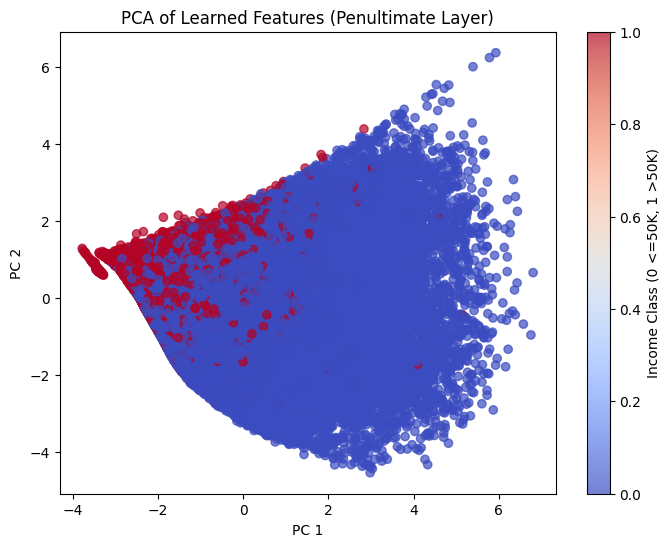

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_feats = pca.fit_transform(train_features)

plt.figure(figsize=(8, 6))
plt.scatter(
    reduced_feats[:, 0],
    reduced_feats[:, 1],
    c=train_labels,
    cmap="coolwarm",
    alpha=0.7
)
plt.colorbar(label="Income Class (0 <=50K, 1 >50K)")
plt.title("PCA of Learned Features (Penultimate Layer)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


In [ ]:
explanation = '''
Through PCA, we succcessfully transitioned the high-dimensional data
into a latent space (low-dimensional space) and differentiated the class 0 (Blue) from class 1 (Red).
We can see the datapoints of the class 1 are heavily gathered around PC 1 [-4:0], and PC 2 [0:2]. '''

# Module 2: Optimization

Neural networks are optimized through an iterative process of adjusting their weights to improve the accuracy of predictions and classifications. The primary goal during optimization is to minimize the error between the network's predictions and the actual target values. This process relies on various techniques and algorithms to systematically update the weights based on how well the network is performing.

This notebooks features some code and concepts from the UPenn CS-522 course, specifically their [week 4 on Optimisation](https://github.com/CIS-522/course-content/tree/main/tutorials/W04_Optimization), and [week 5 on Regularisation](https://github.com/CIS-522/course-content/tree/main/tutorials/W05_Regularization), and we are grateful for their content and support! We would also highly recommend them as resources for more code and content on optimisation, regularisation, and other content on deep learning. (We are co-teaching a summer Deep Learning Academy with them this summer).

**Notes about the tutorial**: Much like the last tutorial, there is a lot more code here. Once again, a lot of that code is just to setup data and some of the neural nets, and we have tried to comment the code as extensively as possible. Like last time, we highly recommend looking at the homework at the bottom of the notebook so that you can manage your time on the notebook better. Getting to know about the possible range of optimization options and regularisation options is a necessary exercise to get the most out of your deep neural models. Throughout this notebook, you will also encounter some exploratory questions. You need not answer them in the notebook but you are encouraged to search for the answers (or ask us if you can't find them!)

Your purpose in this notebook is to be able to adapt your PyTorch models with the various techniques we discuss below. All the primary code in the notebook is in PyTorch with links to resources or documentation for similar options in Keras.

Optimization in a neural network refers to the process of adjusting the weights of your neural network on the way to make a better prediction. Here, we are attempting to find a local minima which minimizes the error of the predictions made. Here are some basic resources to read up on the topic:

[Neural Network Optimization](https://towardsdatascience.com/neural-network-optimization-7ca72d4db3e0).

[Parameter and weights optimization for Neural Networks](https://www.deeplearning.ai/ai-notes/optimization/).

In [ ]:
# imports
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import requests
import io
from urllib.request import urlopen


---
## Minibatch stochastic gradient descent (SGD)

In stochastic gradient descent, we replace the actual gradient vector with a stochastic estimation of the gradient vector. Specifically for a neural network, the stochastic estimation uses the gradient of the loss for a single data point (single instance).

Given $f_i=l(x_i, y_i, w)$, the expected value of the $t$-th step of SGD is the same as the $t$-th step of full gradient descent.

$$\mathbb{E}[w_{t+1}]=w_t-\eta \mathbb{E}[\nabla f_i(w_t)]=w_t-\eta\nabla f(w_t)$$

where $i$ is chosen uniformly at random, thereby $f_i$ is a noisy but unbiased estimator of $f$.

$$w_{t+1}=w_t-\eta\nabla f_i(w_t)$$

We update the weights according to the gradient over $f_i$ (as opposed to the gradient over the total loss $f$).

SGD advantages:
*   The noise in the SGD update can prevent convergence to a bad (shallow) local minima.
*   It is drastically cheaper to compute (as you don’t go over all data points).


### Minibatching

Often we are able to make better use of our hardware by using mini batches instead of single instances. We compute the loss over a mini-batch -- a set of randomly selected instances instead of calculating it over just one instance. This reduces the noise in the step update.

Given the $t$th minibatch $B_t$ consisting of $k$ observations:

$$w_{t+1}=w_t-\eta \frac{1}{|B_t|}\sum_{i\in B}\nabla f_i(w_t)$$


One of the main constraints of training deep neural networks is the relatively limited size of GPU memory. Being able to quickly estimate if your minibatch size can be held in that memory will save you time and out-of-memory errors.

What do we need to store at training time?
- outputs of intermediate layers (forward pass):
- model parameters
- error signal at each neuron
- the gradient of parameters
plus any extra memory needed by optimizer (e.g. for momentum)



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        # set optimiser to zero
        optimizer.zero_grad()
        # pass the data through the model
        output = model(data)
        # calculate loss
        loss = F.nll_loss(output, target)
        # backprop
        loss.backward()
        # move optimiser
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return 100. * correct / len(test_loader.dataset)

In [ ]:
def main(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    torch.manual_seed(args['seed'])
    device = torch.device('cuda' if use_cuda else 'cpu')

    train_kwargs = {'batch_size': args['batch_size']}
    test_kwargs = {'batch_size': args['test_batch_size']}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True,
                       transform=transform),**train_kwargs)
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False,
                       transform=transform), **test_kwargs)

    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    acc_list, time_list = [], []
    start_time = time.time()
    for epoch in range(1, args['epochs'] + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        time_list.append(time.time()-start_time)
        acc = test(model, device, test_loader)
        acc_list.append(acc)

    return acc_list, time_list

In [ ]:
# Training settings
args = {'batch_size': 32,
        'test_batch_size': 1000,
        'epochs': 3,
        'lr': 0.01,
        'momentum': 0.9,
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

batch_size = [8, 16, 32, 64, 256, 512, 1024]
acc_dict = {}
test_acc = []

In [ ]:


for i in range(len(batch_size)):
    args['batch_size'] = batch_size[i]
    acc, timer = main(args)
    acc_dict['acc'+str(batch_size[i])] = acc
    acc_dict['time'+str(batch_size[i])] = timer
    test_acc.append(acc[-1])

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 9.91M/9.91M [00:10<00:00, 902kB/s] 


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:06<00:00, 239kB/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.93MB/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Train Epoch: 1 [0/60000 (0%)]	Loss: 2.212950
Train Epoch: 1 [800/60000 (1%)]	Loss: 0.633358
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.387849
Train Epoch: 1 [2400/60000 (4%)]	Loss: 0.146681
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.374804
Train Epoch: 1 [4000/60000 (7%)]	Loss: 0.176324
Train Epoch: 1 [4800/60000 (8%)]	Loss: 1.137902
Train Epoch: 1 [5600/60000 (9%)]	Loss: 0.165800
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.556258
Train Epoch: 1 [7200/60000 (12%)]	Loss: 0.226273
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.011656
Train Epoch: 1 [8800/60000 (15%)]	Loss: 1.092710
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.028158
Train Epoch: 1 [10400/60000 (17%)]	Loss: 0.230705
Train Epoch: 1 [11200/60000 (19%)]	Loss: 0.546691
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.198070
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.174880
Train Epoch: 1 [13600/60000 (23%)]	Loss: 0.493409
Train Epoch: 1 [14400/60000 (24%)]	Loss: 0.001052
Train Epoch: 1 [15200/60000 (25%)]	Loss: 0.002356
Train Epoch: 1 [16000/600

In [ ]:

plt.plot(batch_size, test_acc, linewidth=2)
plt.title('Optimal Minibach Size')
plt.ylabel('Test Accuracy (%)')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.savefig('minibatch.png')
plt.show()

---
## Batch normalization

Rather than improving the optimization algorithms, batch normalization improves the network structure itself by adding additional layers in between existing layers. The goal is to improve the optimization and generalization performance.

In neural networks, we typically alternate linear (weighted summation) operations with non-linear operations, the activation functions, such as ReLU. The most common practice is to put the normalization between the linear layers and activation functions.

More formally, normalization is as follows:
$$\tilde x_j = a\frac{x_j-\mu_j}{\sigma_j}+b$$
where
*   $x_j$ is the output of a neuron or, equivalently, the input to the next layer,
*   $\tilde x_j$ is that same feature after being normalized ,
*   $\mu_j$ is the mean of the feature $x_j$ over the minibatch,
*   $\sigma_j$ is the estimate of the standard deviation of $x_j$ over the minibatch (with $\epsilon$ added, so we don't divide by zero),
*   $a$ is the learnable scaling factor,
*   $b$ is the learnable bias term.

Batch normalization tries to reduce the “internal covariate shift” between training and testing data. Internal covariate shift is the change in the distribution of network activations due to the change in paramaters during training. In neural networks, the output of the first layer feeds into the second layer, the output of the second layer feeds into the third, and so on. When the parameters of a layer change, so does the distribution of inputs to subsequent layers. These shifts in input distributions can be problematic for neural networks, especially deep neural networks that could have a large number of layers. Batch normalization tries to mitigate this. You can check out [this](https://arxiv.org/abs/1502.03167) paper where the idea of mitigating internal covariance shift with batch normalization was first introduced.


The advantages of BN are as follows:

*   Networks with normalization layers are easier to optimize, allowing for the use of larger learning rates, speeding up the training of neural networks.
*   The mean/std deviation estimates are noisy due to the randomness of the samples in batch. This extra “noise” sometimes results in better generalization. Normalization has a regularization effect.
*   Normalization reduces sensitivity to weight initialization.


In [ ]:
#help functions
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    avg_loss = 0.
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        avg_loss += loss.item()
        loss.backward()
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    avg_loss /= len(train_loader.dataset)
    return avg_loss

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss

def bn_eval(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    torch.manual_seed(args['seed'])
    device = torch.device('cuda' if use_cuda else 'cpu')

    train_kwargs = {'batch_size': args['batch_size']}
    test_kwargs = {'batch_size': args['test_batch_size']}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True,
                       transform=transform),**train_kwargs)
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False,
                       transform=transform), **test_kwargs)

    if args['net_type'] == 'Shallow':
        model = Net().to(device)
    elif args['net_type'] == 'BNShallow':
        model = BNShallowNet().to(device)
    elif args['net_type'] == 'Deep':
        model = DeepNet().to(device)
    elif args['net_type'] == 'BNDeep':
        model = BNDeepNet().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    train_list, test_list = [], []
    for epoch in range(1, args['epochs'] + 1):
        train_loss = train(args, model, device, train_loader, optimizer, epoch)
        test_loss = test(model, device, test_loader)
        train_list.append(train_loss)
        test_list.append(test_loss)

    return train_list, test_list

In [ ]:
#models
class BNShallowNet(nn.Module):
    def __init__(self):
        super(BNShallowNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        self.bn = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.bn(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


In [ ]:
class BNDeepNet(nn.Module):
    def __init__(self):
        super(BNDeepNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 10)
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.bn3 = nn.BatchNorm1d(32)
        self.bn4 = nn.BatchNorm1d(32)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc5(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc5(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
#train
args = {'batch_size': 64,
        'test_batch_size': 1000,
        'epochs': 10,
        'lr': 0.01,
        'momentum': 0.9,
        'net_type': 'Net',
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

net = ['Shallow', 'BNShallow', 'Deep', 'BNDeep']
loss_dict = {}

for i in range(len(net)):
    args['net_type'] = net[i]
    train_loss, test_loss = bn_eval(args)
    loss_dict['train' + str(net[i])] = train_loss
    loss_dict['test' + str(net[i])] = test_loss

## Momentum

Momentum in gradient descent is similar to the concept of momentum in physics. The optimization process resembles a ball rolling down the hill. Momentum keeps the ball moving in the same direction that it is already moving in. The gradient can be thought of as a force pushing the ball in some other direction.

<p align="center">
  <img width="460" height="300" src="https://miro.medium.com/max/640/1*i1Qc2E0TVlPHEKG7LepXgA.gif">
</p>

Mathematically it can be expressed as follows-
$$w_{t+1}=w_t-\eta (\nabla f(w_t) +\beta m_{t}) $$
$$m_{t+1}= \nabla f(w_t) +\beta m_{t}$$
or, equivalently
$$w_{t+1}= w_t -\eta\nabla f(w_t) +\beta (w_{t} -w_{t-1})$$

where
*   $m$ is the momentum (the running average of the past gradients, initialized at zero),
*   $\beta\in [0,1)$ is the damping factor, usually $0.9$ or $0.99$.



Let’s consider two extreme cases to understand this decay rate parameter better. If the decay rate is 0, then it is exactly the same as (vanilla) gradient descent (blue ball). If the decay rate is 1 (and provided that the learning rate is reasonably small), then it rocks back and forth endlessly like the frictionless ball we saw previously; you do not want that. Typically the decay rate is chosen around 0.8–0.9 — it’s like a surface with a little bit of friction so it eventually slows down and stops (purple ball).

<p align="center">
  <img width="460" height="300" src="https://miro.medium.com/max/800/1*zVi4ayX9u0MQQwa90CnxVg.gif">
</p>



In [ ]:
#useful link:
#https://distill.pub/2017/momentum/

In the standard SGD formulation, every weight in network is updated with the same learning rate (global $\eta$). Here, we adapt a learning rate for each weight individually, using information we get from their gradients.

## Adagrad

Adagrad adapts the learning rate of each parameter, downweighting the learning rates for parameters that have changed a lot and upweighting the learning rates of parameters that have changed very little.

It uses a different learning rate for every parameter $w_j$ at every time step, $t$. (The time step here in practice is a minibatch, with everything averaged over that minibatch.) The update for every parameter $w_j$ at each time step (or epoch) $t$ then becomes

$$w_{t+1}=w_t- \frac{\eta}{\sqrt{v_{t+1}+\epsilon}} \nabla f(w_t)$$

where the equation holds for every feature $w_j$ separately. Thus, $\nabla f(w_{t})$ is the partial derivative of the objective function w.r.t. to the parameter $w_j$ at time step $t$ and the learning rate for each feature is scaled using the sum of the gradients for that feature:

$$v_{t+1} = \sum^t_{\tau=1} \nabla f(w_{\tau})^2$$

Adagrad effectively selects low learning rates for parameters associated with frequently occurring features, and high learning rates for parameters associated with infrequent features. It is thus well-suited for dealing with sparse data.


## RMSprop

RMSprop seeks to reduce Adagrad's aggressive, monotonically decreasing learning rate. Instead of accumulating all past squared gradients, RMSprop restricts the window of accumulated past gradients to some fixed size. The sum of gradients is recursively defined as a decaying average of all past squared gradients.

$$w_{t+1}=w_t- \frac{\eta}{\sqrt{v_{t+1}+\epsilon}} \nabla f(w_t)$$
$$v_{t+1}=\alpha v_t+(1-\alpha)(\nabla f(w_t))^2$$

where
*   $v$ is the 2nd moment estimate which depends (as a fraction $\alpha$ similarly to the Momentum term) on the previous average and the current gradient.
*   $\alpha$ is usually set to $0.9$, while a good default value for the learning rate $\eta$ is $0.001$.

We update $v$ to estimate this noisy quantity via an exponential moving average (which is a standard way of maintaining an average of a quantity that may change over time). We need to put larger weights on the newer values as they provide more information. One way to do that is down-weight old values exponentially. The values in the $v$ calculation that are very old are down-weighted at each step by an $\alpha$ constant, which varies between 0 and 1. This dampens the old values until they are no longer an important part of the exponential moving average.

## Adam

Adam (from "Adaptive moments") is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp (described in lecture) and Momentum.

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction).
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction).
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$:

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages.
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

As usual, we will store all parameters in the `parameters` dictionary.

The

## Learn and compare different adaptive learning rate optimizers

For SGD with fixed schedule, Adagrad, RMSprop, Adam, how do they differ on train and test error? Which one works the best?

We compare these optimizers by performing digit classification task in MNIST.

In [ ]:
def optimizer_eval(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    torch.manual_seed(args['seed'])
    device = torch.device('cuda' if use_cuda else 'cpu')

    train_kwargs = {'batch_size': args['batch_size']}
    test_kwargs = {'batch_size': args['test_batch_size']}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True,
                       transform=transform),**train_kwargs)
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False,
                       transform=transform), **test_kwargs)

    model = Net().to(device)
    if args['optimizer'] == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=args['lr'])
    elif args['optimizer'] == 'adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=args['lr'])
    elif args['optimizer'] == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=1e-3)
    elif args['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=1e-3)

    train_list, test_list = [], []
    for epoch in range(1, args['epochs'] + 1):
        train_acc = train(args, model, device, train_loader, optimizer, epoch)
        train_list.append(100.-train_acc)
        test_acc = test(model, device, test_loader)
        test_list.append(100.-test_acc)

    return train_list, test_list

The training takes over 20 mins. Please skip running below cells for now and come back when time allows.

In [ ]:
# Training settings
args = {'batch_size': 64,
        'test_batch_size': 1000,
        'epochs': 10,
        'lr': 0.01,
        'momentum': 0.9,
        'net_type': 'Net',
        'anneal_type': 'linear',
        'optimizer': 'sgd',
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

In [ ]:
optimizer = ['sgd', 'adagrad', 'rmsprop', 'adam']
error_dict = {}


In [ ]:

for i in range(len(optimizer)):
    args['optimizer'] = optimizer[i]
    train_error, test_error = optimizer_eval(args)
    error_dict['train' + str(optimizer[i])] = train_error
    error_dict['test' + str(optimizer[i])] = test_error

In [ ]:
  fig, axs = plt.subplots(1, 2, figsize=(10,4))
  axs[0].plot(error_dict['trainsgd'], label='SGD', color='b')
  axs[1].plot(error_dict['testsgd'], label='SGD', color='b', linestyle='dashed')
  axs[0].plot(error_dict['trainadagrad'], label='Adagrad', color='r')
  axs[1].plot(error_dict['testadagrad'], label='Adagrad', color='r', linestyle='dashed')
  axs[0].plot(error_dict['trainrmsprop'], label='RMSprop', color='g')
  axs[1].plot(error_dict['testrmsprop'], label='RMSprop', color='g', linestyle='dashed')
  axs[0].plot(error_dict['trainadam'], label='Adam', color='orange')
  axs[1].plot(error_dict['testadam'], label='Adam', color='orange', linestyle='dashed')
  axs[0].set_title('Train')
  axs[1].set_title('Test')
  axs[0].set_ylabel('Error (%)')
  #plt.yscale('log')
  axs[0].set_xlabel('Epoch')
  axs[1].set_xlabel('Epoch')
  axs[0].legend()
  axs[1].legend()
  plt.show()

Plot the train and test classification error curves of different optimizers by running below cell.

## Learning rate scheduling

If the learning rate is too large, optimization diverges; if it is too small, it takes too long to train or we end up with a suboptimal result. People often start large learning rate and then 'decay' or 'anneal'(decrease) it.  This can help both optimization and generalization.

Common beliefs in how annealing works come from the optimization analysis of stochastic gradient descent:

1.   An initial large learning rate accelerates training or helps the network escape spurious local minima
2.   Decaying the learning rate helps the network converge to a local minimum and avoid oscillation.

The simplest learning rate schedule is to decrease the learning rate linearly from a large initial value to a small value. This allows large weight changes in the beginning of the learning process and small changes or fine-tuning towards the end of the learning process. There are other schedules such as square root and exponential decay.


### Compare different annealing schedules: constant, linear, sqrt(t) and exp(-t)


Firstly, let's plot the simulation of different annealing scheduels: constant, linear, sqrt(t) and exp(-t) in below cell.

In [ ]:
model = torch.nn.Linear(2, 1)
lr_anneal = ['constant', 'linear', 'sqrt', 'exp']
lr_dict = defaultdict(list)

for idx in range(len(lr_anneal)):
    optimizer = optim.SGD(model.parameters(), lr=1e-2)
    if lr_anneal[idx] == 'constant':
        lambda1 = lambda epoch: 1
    elif lr_anneal[idx] == 'linear':
        lambda1 = lambda epoch: max(1e-7, 1 - 0.1*epoch)
    elif lr_anneal[idx] == 'sqrt':
        lambda1 = lambda epoch: (epoch + 1.0) ** -0.5
    elif lr_anneal[idx] == 'exp':
        lambda1 = lambda epoch: 0.1 ** epoch
    scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
    for i in range(10):
        optimizer.step()
        lr_dict[lr_anneal[idx]].append(optimizer.param_groups[0]["lr"])
        scheduler.step()


plt.plot(range(10), lr_dict['constant'], label='Constant')
plt.plot(range(10), lr_dict['linear'], label='Linear')
plt.plot(range(10), lr_dict['sqrt'], label='Sqrt')
plt.plot(range(10), lr_dict['exp'], label='Exp')
plt.title('Annealing Schedules')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Now, check your assumption by running below digit classification example with different learning rate scheduelers: linear, sqrt(t) and exp(-t).

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc2 = nn.Linear(128, 10)
        self.fc3 = nn.Linear(784, 128)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    avg_loss, correct = (0., 0.)
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        avg_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        loss.backward()
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    avg_loss /= len(train_loader.dataset)
    return 100. * correct / len(train_loader.dataset)


In [ ]:

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return 100. * correct / len(test_loader.dataset)

In [ ]:
def schedular_eval(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    torch.manual_seed(args['seed'])
    device = torch.device('cuda' if use_cuda else 'cpu')

    train_kwargs = {'batch_size': args['batch_size']}
    test_kwargs = {'batch_size': args['test_batch_size']}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True,
                       transform=transform),**train_kwargs)
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False,
                       transform=transform), **test_kwargs)

    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    if args['anneal_type'] == 'constant':
        lambda1 = lambda epoch: 1
    elif args['anneal_type'] == 'linear':
        lambda1 = lambda epoch: max(1e-7, 1 -0.1 * epoch)
    elif args['anneal_type'] == 'sqrt':
        lambda1 = lambda epoch: (epoch + 1.0) ** -0.5
    elif args['anneal_type'] == 'exp':
        lambda1 = lambda epoch: 0.1 ** epoch
    scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

    train_list, test_list = [], []
    for epoch in range(1, args['epochs'] + 1):
        '''
        if epoch > 1:
            for param_group in optimizer.param_groups:
                param_group['lr'] *= 0.1
        '''
        train_acc = train(args, model, device, train_loader, optimizer, epoch)
        train_list.append(100.-train_acc)
        test_acc = test(model, device, test_loader)
        test_list.append(100.-test_acc)
        scheduler.step()

    return train_list, test_list

The training takes over 20 mins. Please skip running below cells for now and come back when (or if) time allows.

In [ ]:
# Training settings
args = {'batch_size': 64,
        'test_batch_size': 1000,
        'epochs': 10,
        'lr': 0.01,
        'momentum': 0.9,
        'net_type': 'Net',
        'anneal_type': 'linear',
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

In [ ]:
lr_anneal = ['constant', 'linear', 'sqrt', 'exp']
error_dict = {}


In [ ]:
for i in range(len(lr_anneal)):
    args['anneal_type'] = lr_anneal[i]
    train_error, test_error = schedular_eval(args)
    error_dict['train' + str(lr_anneal[i])] = train_error
    error_dict['test' + str(lr_anneal[i])] = test_error

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(error_dict['trainconstant'], label='Constant', color='b')
axs[1].plot(error_dict['testconstant'], label='Constant', color='b', linestyle='dashed')
axs[0].plot(error_dict['trainlinear'], label='Linear', color='r')
axs[1].plot(error_dict['testlinear'], label='Linear', color='r', linestyle='dashed')
axs[0].plot(error_dict['trainsqrt'], label='Sqrt', color='g')
axs[1].plot(error_dict['testsqrt'], label='Sqrt', color='g', linestyle='dashed')
axs[0].plot(error_dict['trainexp'], label='Exp', color='orange')
axs[1].plot(error_dict['testexp'], label='Exp', color='orange', linestyle='dashed')
axs[0].set_title('Train')
axs[1].set_title('Test')
axs[0].set_ylabel('Error (%)')
#plt.yscale('log')
axs[0].set_xlabel('Epoch')
axs[1].set_xlabel('Epoch')
axs[0].legend()
axs[1].legend()
plt.show()

# (Optional) ResNet
Residual Networks can be used to improve the deep models in your experiments, particularly in tasks where vanishing gradients or overfitting are issues. Specifically ResNet architectures are inherently regularized due to residual connections. Incorporating them can complement techniques like dropout or batch normalization for better performance.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Defines a Residual Block, the core building block of ResNet. It includes:

- Two fully connected layers with batch normalization.
- A shortcut connection that adds the input to the output of the block, enabling residual learning

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features):
        super(ResidualBlock, self).__init__()
        self.linear1 = nn.Linear(in_features, out_features)
        self.bn1 = nn.BatchNorm1d(out_features)
        self.linear2 = nn.Linear(out_features, out_features)
        self.bn2 = nn.BatchNorm1d(out_features)
        self.shortcut = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)
        out = F.relu(self.bn1(self.linear1(x)))
        out = self.bn2(self.linear2(out))
        out += residual
        return F.relu(out)


Defines the ResNet Optimization Model, which stacks the residual blocks for feature extraction. The model architecture:

- Uses two residual blocks.
- Outputs probabilities using a softmax layer.

In [ ]:
class ResNetOptimizationModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ResNetOptimizationModel, self).__init__()
        # Residual Blocks
        self.res_block1 = ResidualBlock(input_dim, 128)
        self.res_block2 = ResidualBlock(128, 64)
        # Output Layer
        self.output_layer = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.res_block1(x)
        x = self.res_block2(x)
        return F.log_softmax(self.output_layer(x), dim=1)


Training and Evaluation

In [ ]:
def train_resnet(args, model, device, train_loader, optimizer, epoch):
    model.train()
    avg_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.view(data.size(0), -1).to(device), target.to(device)  # Flatten data
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        avg_loss += loss.item()
        loss.backward()
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} "
                  f"({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")
    avg_loss /= len(train_loader.dataset)
    return avg_loss


In [ ]:
def test_resnet(model, device, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.view(data.size(0), -1).to(device), target.to(device)  # Flatten data
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} "
          f"({accuracy:.2f}%)\n")
    return accuracy


In [ ]:
def optimization_resnet(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    torch.manual_seed(args['seed'])
    device = torch.device("cuda" if use_cuda else "cpu")

    # Load MNIST data
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST("../data", train=True, download=True, transform=transform),
        batch_size=args['batch_size'], shuffle=True
    )
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST("../data", train=False, transform=transform),
        batch_size=args['test_batch_size'], shuffle=False
    )

    # Initialize ResNet model
    input_dim = 28 * 28  # MNIST images are 28x28
    model = ResNetOptimizationModel(input_dim, num_classes=10).to(device)

    # Set optimizer
    if args['optimizer'] == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])
    elif args['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=args['lr'])
    elif args['optimizer'] == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=args['lr'])
    elif args['optimizer'] == 'adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=args['lr'])

    train_losses, test_accuracies = [], []
    for epoch in range(1, args['epochs'] + 1):
        train_loss = train_resnet(args, model, device, train_loader, optimizer, epoch)
        test_accuracy = test_resnet(model, device, test_loader)
        train_losses.append(train_loss)
        test_accuracies.append(test_accuracy)

    return train_losses, test_accuracies


Let's run and compare the results

In [ ]:
# Experiment parameters
args = {
    'batch_size': 64,
    'test_batch_size': 1000,
    'epochs': 10,
    'lr': 0.01,
    'momentum': 0.9,
    'optimizer': 'adam',  # Change to 'sgd', 'adagrad', or 'rmsprop' for comparison
    'no_cuda': False,
    'seed': 1,
    'log_interval': 100
}

# Run experiments with different optimizers
optimizers = ['sgd', 'adam', 'rmsprop', 'adagrad']
results = {}

for opt in optimizers:
    print(f"\nRunning experiment with optimizer: {opt}")
    args['optimizer'] = opt
    train_losses, test_accuracies = optimization_resnet(args)
    results[opt] = {
        'train_losses': train_losses,
        'test_accuracies': test_accuracies
    }

# Visualize results
for opt in optimizers:
    plt.plot(results[opt]['test_accuracies'], label=opt)

plt.title("ResNet Optimization Comparison")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

## Concluding Optimisation

So we've seen a bunch of different optimizing methods, Batch Normalisation layers, and annealing methods which control the way the optimisation tapers off. Usually, we focus on optimisation technique and fine tuning after we've decided on the model we want to use on the data, though it is worth keeping an eye on the general optimisation techniques when we are training (such as the kind of optimiser we will be choosing). Optimisation works in tandem with the second set of topics we will be exploring, Regularisation, in part of being the key ways we truly master training a model. Model architecture and deciding the right kind of model for your data is crucial, but optimisation and regularisation is what it make the model ready for production (if that is your goal!).

So while optimisation dealt with the way our model back propagates information about changing the model weights based on the predictions, *regularisation* deals with ways we can allow our model to generalise better, and avoid over-fitting our model, and allowing it to be flexible in the way it deals with new data. In the following section, we will deal with multiple ways to regularise our data. We will continue dealing with image based models, but will move to a different dataset which is more complex, of animal faces.





## Keras Options

Here are set of links and resources for optimisation with Keras.

[Keras Optimizer Documentation](https://keras.io/api/optimizers/)

[Blog post on Keras optimizer options](https://machinelearningknowledge.ai/keras-optimizers-explained-with-examples-for-beginners/)


# Homework Assignments

**1)** Build or reuse an older model you have built, and use 3 different optimization techniques or methods on the model. For one of these models, add a batch normalization layer.

In [ ]:
def train_model(model, dataloader, optimizer, criterion, num_epochs=50, l1_reg=0.0):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0.0
        for numeric, categorical, labels in dataloader:
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(numeric, categorical)
            loss = criterion(outputs, labels)

            if l1_reg > 0.0:
                l1_penalty = 0
                for param in model.parameters():
                    l1_penalty += torch.sum(torch.abs(param))
                loss += l1_reg * l1_penalty

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {total_loss/len(dataloader):.4f}")

def evaluate_model(model, dataloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for numeric, categorical, labels in dataloader:
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)
            logits = model(numeric, categorical)
            _, preds = torch.max(logits, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = 100.0 * correct / total
    print(f"Accuracy: {acc:.2f}%")
    return acc


1) Model with SGD (no BN)

In [ ]:
num_numeric = len(numeric_features)
cat_cardinalities = [ len(train_dataset.cat_encoders[c].classes_) for c in categorical_features ]

model_sgd = BaselineModel(num_numeric, cat_cardinalities, hidden_units=[64,32], dropout_rate=0.1)
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)

print("--- Training with SGD ---")
train_model(model_sgd, train_loader, optimizer_sgd, criterion, num_epochs=50)
print("--- Evaluating with SGD on Test ---")
acc_sgd = evaluate_model(model_sgd, test_loader)



--- Training with SGD ---
Epoch [1/50] Loss: 0.5406
Epoch [2/50] Loss: 0.5291
Epoch [3/50] Loss: 0.5284
Epoch [4/50] Loss: 0.5248
Epoch [5/50] Loss: 0.5220
Epoch [6/50] Loss: 0.5188
Epoch [7/50] Loss: 0.5175
Epoch [8/50] Loss: 0.5192
Epoch [9/50] Loss: 0.5182
Epoch [10/50] Loss: 0.5160
Epoch [11/50] Loss: 0.5161
Epoch [12/50] Loss: 0.5157
Epoch [13/50] Loss: 0.5170
Epoch [14/50] Loss: 0.5154
Epoch [15/50] Loss: 0.5158
Epoch [16/50] Loss: 0.5160
Epoch [17/50] Loss: 0.5148
Epoch [18/50] Loss: 0.5139
Epoch [19/50] Loss: 0.5125
Epoch [20/50] Loss: 0.5125
Epoch [21/50] Loss: 0.5108
Epoch [22/50] Loss: 0.5112
Epoch [23/50] Loss: 0.5105
Epoch [24/50] Loss: 0.5111
Epoch [25/50] Loss: 0.5091
Epoch [26/50] Loss: 0.5093
Epoch [27/50] Loss: 0.5109
Epoch [28/50] Loss: 0.5112
Epoch [29/50] Loss: 0.5094
Epoch [30/50] Loss: 0.5081
Epoch [31/50] Loss: 0.5081
Epoch [32/50] Loss: 0.5094
Epoch [33/50] Loss: 0.5080
Epoch [34/50] Loss: 0.5068
Epoch [35/50] Loss: 0.5088
Epoch [36/50] Loss: 0.5071
Epoch [37/

2) Model with Adam (with Batch Normalization)

In [ ]:
class BaselineModelBN(nn.Module):
    def __init__(
        self,
        num_numeric,
        cat_cardinalities,
        hidden_units=[64, 32],
        dropout_rate=0.0,
    ):
        super(BaselineModelBN, self).__init__()
        self.embeddings = nn.ModuleList([
            nn.Embedding(cardinality, int(math.sqrt(cardinality)))
            for cardinality in cat_cardinalities
        ])
        total_emb_dim = sum([emb.embedding_dim for emb in self.embeddings])
        input_dim = num_numeric + total_emb_dim

        self.hidden_layers = nn.ModuleList()
        self.batchnorms = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        self.activations = nn.ModuleList()

        prev_dim = input_dim
        for h in hidden_units:
            self.hidden_layers.append(nn.Linear(prev_dim, h))
            self.batchnorms.append(nn.BatchNorm1d(h))
            self.dropouts.append(nn.Dropout(dropout_rate))
            self.activations.append(nn.ReLU())
            prev_dim = h

        self.output = nn.Linear(prev_dim, 2)

    def forward(self, numeric, categorical):
        embedded = []
        for i, emb in enumerate(self.embeddings):
            emb_i = emb(categorical[:, i])
            embedded.append(emb_i)
        cat_emb = torch.cat(embedded, dim=1)

        x = torch.cat([numeric, cat_emb], dim=1)

        for layer, bn, drop, act in zip(self.hidden_layers, self.batchnorms, self.dropouts, self.activations):
            x = layer(x)
            x = bn(x)
            x = act(x)
            x = drop(x)

        logits = self.output(x)
        return logits


In [ ]:
model_adam_bn = BaselineModelBN(num_numeric, cat_cardinalities, hidden_units=[64,32], dropout_rate=0.1)
criterion = nn.CrossEntropyLoss()
optimizer_adam = optim.Adam(model_adam_bn.parameters(), lr=0.001)

print("--- Training with Adam + BatchNorm ---")
train_model(model_adam_bn, train_loader, optimizer_adam, criterion, num_epochs=50)
print("--- Evaluating with Adam + BatchNorm on Test ---")
acc_adam_bn = evaluate_model(model_adam_bn, test_loader)



--- Training with Adam + BatchNorm ---
Epoch [1/50] Loss: 0.5487
Epoch [2/50] Loss: 0.5062
Epoch [3/50] Loss: 0.4912
Epoch [4/50] Loss: 0.4587
Epoch [5/50] Loss: 0.4284
Epoch [6/50] Loss: 0.4080
Epoch [7/50] Loss: 0.4014
Epoch [8/50] Loss: 0.3917
Epoch [9/50] Loss: 0.3916
Epoch [10/50] Loss: 0.3848
Epoch [11/50] Loss: 0.3852
Epoch [12/50] Loss: 0.3797
Epoch [13/50] Loss: 0.3828
Epoch [14/50] Loss: 0.3716
Epoch [15/50] Loss: 0.3726
Epoch [16/50] Loss: 0.3683
Epoch [17/50] Loss: 0.3673
Epoch [18/50] Loss: 0.3635
Epoch [19/50] Loss: 0.3631
Epoch [20/50] Loss: 0.3599
Epoch [21/50] Loss: 0.3625
Epoch [22/50] Loss: 0.3609
Epoch [23/50] Loss: 0.3602
Epoch [24/50] Loss: 0.3596
Epoch [25/50] Loss: 0.3596
Epoch [26/50] Loss: 0.3552
Epoch [27/50] Loss: 0.3536
Epoch [28/50] Loss: 0.3522
Epoch [29/50] Loss: 0.3530
Epoch [30/50] Loss: 0.3507
Epoch [31/50] Loss: 0.3510
Epoch [32/50] Loss: 0.3504
Epoch [33/50] Loss: 0.3491
Epoch [34/50] Loss: 0.3523
Epoch [35/50] Loss: 0.3491
Epoch [36/50] Loss: 0.35

3) Model with RMSProp (no BN)

In [ ]:
model_rms = BaselineModel(num_numeric, cat_cardinalities, hidden_units=[64,32], dropout_rate=0.1)
criterion = nn.CrossEntropyLoss()
optimizer_rms = optim.RMSprop(model_rms.parameters(), lr=0.001)

print("--- Training with RMSProp ---")
train_model(model_rms, train_loader, optimizer_rms, criterion, num_epochs=50)
print("--- Evaluating with RMSProp on Test ---")
acc_rms = evaluate_model(model_rms, test_loader)



--- Training with RMSProp ---
Epoch [1/50] Loss: 0.5140
Epoch [2/50] Loss: 0.5032
Epoch [3/50] Loss: 0.4895
Epoch [4/50] Loss: 0.4641
Epoch [5/50] Loss: 0.4335
Epoch [6/50] Loss: 0.4196
Epoch [7/50] Loss: 0.4056
Epoch [8/50] Loss: 0.4037
Epoch [9/50] Loss: 0.3953
Epoch [10/50] Loss: 0.3925
Epoch [11/50] Loss: 0.3840
Epoch [12/50] Loss: 0.3822
Epoch [13/50] Loss: 0.3822
Epoch [14/50] Loss: 0.3741
Epoch [15/50] Loss: 0.3740
Epoch [16/50] Loss: 0.3741
Epoch [17/50] Loss: 0.3685
Epoch [18/50] Loss: 0.3669
Epoch [19/50] Loss: 0.3669
Epoch [20/50] Loss: 0.3648
Epoch [21/50] Loss: 0.3638
Epoch [22/50] Loss: 0.3614
Epoch [23/50] Loss: 0.3611
Epoch [24/50] Loss: 0.3601
Epoch [25/50] Loss: 0.3631
Epoch [26/50] Loss: 0.3588
Epoch [27/50] Loss: 0.3570
Epoch [28/50] Loss: 0.3600
Epoch [29/50] Loss: 0.3569
Epoch [30/50] Loss: 0.3586
Epoch [31/50] Loss: 0.3547
Epoch [32/50] Loss: 0.3575
Epoch [33/50] Loss: 0.3542
Epoch [34/50] Loss: 0.3551
Epoch [35/50] Loss: 0.3531
Epoch [36/50] Loss: 0.3496
Epoch 

**2)** Which optimizer performed the best? How did Batch Normalization method effect your model?

Adam with Batch Normalization performed the best. Given the performance, we can conclude that Batch Normalization helped reduce internal covariate shift.

# Module 3: Regularisation

Regularizing neural networks involves implementing techniques to prevent overfitting and improve the model's ability to generalize to new data. These techniques help ensure the network learns meaningful patterns rather than memorizing the training data, ultimately leading to better performance on unseen examples.

Useful links:

- [Chapter 7, deep learning book](https://www.deeplearningbook.org/contents/regularization.html)
- [Slides and Code for PyTorch regularisation from Sebastian Raschka](https://github.com/rasbt/stat479-deep-learning-ss19/tree/master/L10_regularization)
- [towards data science blog post](https://towardsdatascience.com/regularization-in-deep-learning-l1-l2-and-dropout-377e75acc036)
- [medium blog post](https://medium.com/@dhartidhami/regularization-in-deep-learning-2065b7c889e5)

## Setup
Note that some of the code for today can take up to an hour to run. We have therefore "hidden" that code and shown the resulting outputs.


In [ ]:
#@title Import functions
from __future__ import print_function
import torch
import pathlib
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.utils.prune as prune
from torch.optim.lr_scheduler import StepLR
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import copy
from tqdm import tqdm
from IPython.display import HTML, display

In [ ]:
# @title Figure Settings
import ipywidgets as widgets
%matplotlib inline
fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
%config InlineBackend.figure_format = 'retina'
SMALL_SIZE = 12

plt.rcParams.update(plt.rcParamsDefault)
plt.rc('animation', html='jshtml')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

## Loading Animal Faces data

The following cells setup our Animal Faces data source. If you run into trouble with any of these commands,
you can download the zip files directly from the github repos and unzip them manually.

In [ ]:
%%capture
!rm -r AnimalFaces32x32/
!git clone https://github.com/arashash/AnimalFaces32x32
!rm -r afhq/
!unzip ./AnimalFaces32x32/afhq_32x32.zip

In [ ]:
# @title Loading Animal Faces Randomized data

In [ ]:
%%capture
!rm -r Animal_faces_random/
!git clone https://github.com/Ravi3191/Animal_faces_random.git
!rm -r afhq_random_32x32/
!unzip ./Animal_faces_random/afhq_random_32x32.zip
!rm -r afhq_10_32x32/
!unzip ./Animal_faces_random/afhq_10_32x32.zip

In [ ]:
#@title Seeding for Reproducibility
seed = 90108
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False
torch.use_deterministic_algorithms(True)
def seed_worker(worker_id):
    worker_seed = seed % (worker_id+1)
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [ ]:
# @title Helper functions
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis(False)
    plt.show()

Now, lets define a Animal Net model, train, test and main functions which we will use quite frequently this week.

In [ ]:
##Network Class - Animal Faces
class Animal_Net(nn.Module):
    def __init__(self):
        torch.manual_seed(104)
        super(Animal_Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

The train function takes in the current model along with the train_loader and loss function and updates the parameters for a single pass of the entire dataset. The test function takes in the current model after every epoch and calculates the accuracy on the test dataset.


In [ ]:
def train(args, model, device, train_loader, optimizer, epoch,reg_function1=None,reg_function2=None,criterion=F.nll_loss):
    """
    Trains the current inpur model using the data
    from Train_loader and Updates parameters for a single pass
    """
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        if reg_function1 is None:
            loss = criterion(output, target)
        elif reg_function2 is None:
            loss = criterion(output, target)+args['lambda']*reg_function1(model)
        else:
            loss = criterion(output, target)+args['lambda1']*reg_function1(model)+args['lambda2']*reg_function2(model)
        loss.backward()
        optimizer.step()

In [ ]:
def test(model, device, test_loader, loader = 'Test',criterion=F.nll_loss):
    """
    Tests the current Model
    """
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    return 100. * correct / len(test_loader.dataset)

In [ ]:
def main(args, model,train_loader,val_loader,test_data,reg_function1=None,reg_function2=None,criterion=F.nll_loss):
    """
    Trains the model with train_loader and tests the learned model using val_loader
    """

    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')

    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    val_acc_list, train_acc_list,param_norm_list = [], [], []
    for epoch in tqdm(range(args['epochs'])):
        train(args, model, device, train_loader, optimizer, epoch,reg_function1=reg_function1,reg_function2=reg_function2)
        train_acc = test(model,device,train_loader, 'Train')
        val_acc = test(model,device,val_loader, 'Val')
        param_norm = calculate_frobenius_norm(model)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        param_norm_list.append(param_norm)

    return val_acc_list, train_acc_list, param_norm_list, model, 0

One way to think about Regularization is to think in terms of the magnitude of the overall weights of the model. A model with big weights can fit more data perfectly. Wheras a model with smaller weights tend to underperform on the train set but can suprisingly do very well on the test set. Too small weights can also be as issue and it can the underfit the model.

This week we use the sum of Frobenius Norm of all the tensors in the model as a metric to measure the "size of the model".

### Frobenius Norm
Before we start let us do a quick recollection of Frobenius Norm. The Frobenius norm, sometimes also called the Euclidean norm (a term also used for the vector $L^2$ norm--its a high dimensional generatilization!), is matrix norm of an m×n matrix A defined as the square root of the sum of the absolute squares of its elements.
\begin{equation}
||A||_F= \sqrt(\sum_{i=1}^m\sum_{j=1}^n|a_{ij}|^2)
\end{equation}

Let's implement this so we have it handy.

In [ ]:
def calculate_frobenius_norm(model):
    norm = 0.0

    # Sum all the parameters
    for param in model.parameters():
        norm += torch.sum(param**2)

    # Take a square root of the sum of squares of all the parameters
    norm = norm**0.5
    return norm

net = nn.Linear(10,1)
print(f'Frobenius Norm of Single Linear Layer: {calculate_frobenius_norm(net)}')

We use the sum of Frobenius Norm of all the tensors in the model as a metric to measure the "size of the model".

## Overfitting and Memorization

Neural networks with a high number of parameters are prone to overfitting on the training data. Overfitting is when we have low bias and high variance - the model is able to model the training data well but generalises poorly.

In principle, we should not touch our test set until after we have chosen all our hyperparameters. Were we to use the test data in the model selection process, there is a risk that we might overfit the test data. Then we would be in serious trouble. If we overfit our training data, there is always the evaluation on test data to keep us honest. But if we overfit the test data, how would we ever know?

Note that there is another kind of overfitting: you do "honest" fitting on one set of images or posts, or medical records, but it may not generalize to other sets of images, posts or medical records.




### Validation Dataset

A common practice to address this problem is to split our data three ways, using a validation dataset (or validation set) to tune the hyperparameters.

Ideally we would only touch the test data once, to assess the very best model or to compare a small number of models to each other. In the real-world, test data is seldom discarded after just one use.



### Does a neural network memorize?

Given sufficiently large networks and enough training, Neural Networks can acheive almost 100% train accuracy.

In this section we train three MLP's one each on:


1.   Animal Faces Dataset
2.   Completely Noisy Dataset (Random Shuffling of all labels)
3.   Partially Noisy Dataset (Random Shuffling of 15% labels)

Now, let's create the required dataloaders for all the three datasets. Take a quick look at how we split the data. We train on a fraction of the dataset as it will be easier to train and also visualize overfitting.

In [ ]:
##Dataloaders for the Dataset
batch_size = 128
classes = ('cat', 'dog', 'wild')

train_transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
data_path = pathlib.Path('.')/'afhq' # using pathlib to be compatible with all OS's
img_dataset = ImageFolder(data_path/'train', transform=train_transform)


####################################################

##Dataloaders for the  Original Dataset


img_train_data, img_val_data,_ = torch.utils.data.random_split(img_dataset, [100,100,14430])

#Creating train_loader and Val_loader
train_loader = torch.utils.data.DataLoader(img_train_data,batch_size=batch_size,worker_init_fn=seed_worker)
val_loader = torch.utils.data.DataLoader(img_val_data,batch_size=1000,worker_init_fn=seed_worker)

#creating test dataset
test_transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
img_test_dataset = ImageFolder(data_path/'val', transform=test_transform)


####################################################

##Dataloaders for the  Random Dataset

#splitting randomized data into training and validation data
data_path = pathlib.Path('.')/'afhq_random_32x32/afhq_random' # using pathlib to be compatible with all OS's
img_dataset = ImageFolder(data_path/'train', transform=train_transform)
random_img_train_data, random_img_val_data,_ = torch.utils.data.random_split(img_dataset, [100,100,14430])

#Randomized train and validation dataloader
rand_train_loader = torch.utils.data.DataLoader(random_img_train_data,batch_size=batch_size,num_workers = 0, worker_init_fn=seed_worker)
rand_val_loader = torch.utils.data.DataLoader(random_img_val_data,batch_size=1000,num_workers = 0,worker_init_fn=seed_worker)

####################################################

##Dataloaders for the Partially Random Dataset

#Splitting data between training and validation dataset for partially randomized data
data_path = pathlib.Path('.')/'afhq_10_32x32/afhq_10' # using pathlib to be compatible with all OS's
img_dataset = ImageFolder(data_path/'train', transform=train_transform)
partially_random_train_data, partially_random_val_data,_ = torch.utils.data.random_split(img_dataset, [100,100,14430])

#Training and Validation loader for partially randomized data
partial_rand_train_loader = torch.utils.data.DataLoader(partially_random_train_data,batch_size=batch_size,num_workers = 0,worker_init_fn=seed_worker)
partial_rand_val_loader = torch.utils.data.DataLoader(partially_random_val_data,batch_size=1000,num_workers = 0,worker_init_fn=seed_worker)

Now let's define a model which has a very high number of parameters when compared with the training data points and train it on all these datasets.

In [ ]:
##Network Class - Animal Faces
class Big_Animal_Net(nn.Module):
    def __init__(self):
        torch.manual_seed(104)
        super(Big_Animal_Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 124)
        self.fc2 = nn.Linear(124, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
##Here we have 100 true train data.
args = {'test_batch_size': 1000,
        'epochs': 200,
        'lr': 5e-3,
        'momentum': 0.9,
        'no_cuda': False,
        }

acc_dict = {}


In [ ]:
model = Big_Animal_Net()

In [ ]:
start_time = time.time()
val_acc_pure, train_acc_pure, _, model ,_ = main(args,model,train_loader,val_loader,img_test_dataset)
end_time = time.time()

print("Time to memorize the dataset:",end_time - start_time)

##Train and Test accuracy plot

plt.plot(val_acc_pure,label='Val Accuracy Pure',c='red',ls = 'dashed')
plt.plot(train_acc_pure,label='Train Accuracy Pure',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_pure),c = 'green',ls = 'dashed')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
plt.plot(val_acc_pure,label='Val Accuracy Pure',c='red',ls = 'dashed')
plt.plot(train_acc_pure,label='Train Accuracy Pure',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_pure),c = 'green',ls = 'dashed')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Data Visualizer
Before we proceed to train the model on a data with random labels, let us visualize and verify for ourselves if the data is random or not. Here, we have classes = ("cat","dog","wild").


In [ ]:
def Visualize_data(dataloader):
  """
    Inputs: Pytorch Dataloader
    It visualizes the images in the dataset and the classes they belong to.
  """

  for idx,(data,label) in enumerate(dataloader):

    plt.figure(idx)
    #Choose the datapoint you would like to visualize
    index = 22

    #choose that datapoint using index and permute the dimensions and bring the pixel values between [0,1]
    data = data[index].permute(1,2,0)* torch.tensor([0.5,0.5,0.5]) + torch.tensor([0.5,0.5,0.5])

    #Convert the torch tensor into numpy
    data = data.numpy()

    plt.imshow(data)
    image_class = classes[label[index].item()]
    print(f'The image belongs to : {image_class}')

  plt.show()
Visualize_data(rand_train_loader)


We can see that the model is mixed up.

In [ ]:
##Here we have 100 completely shuffled train data.
args = {'epochs': 200,
        'lr': 5e-3,
        'momentum': 0.9,
        'no_cuda': False
        }

acc_dict = {}
model = Big_Animal_Net()


val_acc_random, train_acc_random, _,model,_ = main(args,model,rand_train_loader,val_loader,img_test_dataset)

##Train and Test accuracy plot

plt.plot(val_acc_random,label='Val Accuracy random',c='red',ls = 'dashed')
plt.plot(train_acc_random,label='Train Accuracy random',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_random),c = 'green',ls = 'dashed')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Finally lets train on a partially shuffled dataset where 15% of the labels are noisy.

In [ ]:
##Here we have 100 partially shuffled train data.
args = {'test_batch_size': 1000,
        'epochs': 200,
        'lr': 5e-3,
        'momentum': 0.9,
        'no_cuda': False,
        }

acc_dict = {}
model = Big_Animal_Net()


val_acc_shuffle, train_acc_shuffle, _,_,_ = main(args,model,partial_rand_train_loader,val_loader,img_test_dataset)

#train and test acc plot
plt.plot(val_acc_shuffle,label='Val Accuracy shuffle',c='red',ls = 'dashed')
plt.plot(train_acc_shuffle,label='Train Accuracy shuffle',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_shuffle),c = 'green',ls = 'dashed')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
plt.plot(val_acc_pure,label='Val - Pure',c='red',ls = 'dashed')
plt.plot(train_acc_pure,label='Train - Pure',c='red',ls = 'solid')
plt.plot(val_acc_random,label='Val - Random',c='blue',ls = 'dashed')
plt.plot(train_acc_random,label='Train - Random',c='blue',ls = 'solid')
plt.plot(val_acc_shuffle,label='Val 15% shuffle',c='green',ls = 'dashed')
plt.plot(train_acc_shuffle,label='Train 15% shuffle',c='green',ls = 'solid')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Given that the NN fit/memorize the training data perfectly, Do you think it generalizes well? What makes you think it does or doesn't?


Isn't it supprising to see that the NN was able to acheive 100% train accuracy on randomly shuffled labels. This is one of the reasons why training accuracy is not a good indicator of model performance.

Also it is interesting to note that sometimes the model trained on slightly shuffled data does slightly better than the one trained on pure data.  

##Early Stopping



Now that we have established that the validation accuracy reaches the peak well before the model overfits we want to somehow stop the training early. You should have also observed from the above plots that the train/test loss on real data is not very smooth and hence you might guess that the choice of epoch can play a very large role on the val/test accuracy of your model.

Early stopping is a way to end training when the validation accuracies do not increase for over a certain number of epochs. Though this makes sure that we do not overfit on the train data we still haven't solved the problem of local variance. To overcome this we also save the best model based on the val loss/accuracy for use on test dataset.

![Overfitting](https://images.deepai.org/glossary-terms/early-stopping-machine-learning-5422207.jpg)

The following function figures out the epoch best suited for stopping early.

In [ ]:
def early_stopping_main(args,model,train_loader,val_loader,test_data):

    """
        Inputs:
            Model: Pytorch model
            Loaders: Pytorch Train and Validation loaders
        The function trains the model and terminates the training based on the early stopping criterion.
    """

    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')

    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    patience = 20
    wait = 0

    best_acc  = 0.0
    best_epoch = 0

    val_acc_list, train_acc_list = [], []
    for epoch in tqdm(range(args['epochs'])):
        train(args, model, device, train_loader, optimizer, epoch)
        train_acc = test(model,device,train_loader, 'Train')
        val_acc = test(model,device,val_loader, 'Val')
        if (val_acc > best_acc):
          best_acc = val_acc
          best_epoch = epoch
          best_model = copy.deepcopy(model)
          wait = 0
        else:
          wait += 1
        if (wait > patience):
          print('early stopped on epoch:',epoch)
          break
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

    return val_acc_list, train_acc_list, best_model, best_epoch


In [ ]:
args = {'epochs': 200,
        'lr': 5e-4,
        'momentum': 0.99,
        'no_cuda': False,
        }

acc_dict = {}
model = Animal_Net()

val_acc_pure, train_acc_pure,_,_ ,best_epoch = main(args,model,train_loader,val_loader,img_test_dataset)

model = Animal_Net()
val_acc_earlystop, train_acc_earlystop,_,best_epoch = early_stopping_main(args,model,train_loader,val_loader,img_test_dataset)

print("Maximum Validation Accuracy is reached at epoch:%2d"%(best_epoch))

Do you think Early stopping can be harmful for the training of your network?Discuss among your pod why or why not?

##L1/LASSO Regularization

Some of you might have already come across L1 and L2 regularization before in other courses. L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

***Cost function = Loss (say, binary cross entropy) + Regularization term***

Due to the addition of this regularization term, the values of parameters decrease because it assumes that a neural network with a lower parameter values leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.



L1 Regularization uses a Regularization Function which is the sum of the absolute value of all the weights in DLN, resulting in the following loss function ( L  is the usual Cross Entropy loss):

\begin{equation}
L_R=L+λ∑|w^{(r)}_{ij}|
\end{equation}

At a high level L1 Regularization is similar to L2 Regularization since it leads to smaller weights (you will see the analogy in the next subsection). It results in the following weight update equation when using Stochastic Gradient Descent (where  sgn  is the sign function, such that  sgn(w)=+1  if  w>0 ,  sgn(w)=−1  if  $w<0$ , and sgn(0)=0 ):

\begin{equation}
w^{(r)}_{ij}←w^{(r)}_{ij}−ηλsgn(w^{(r)}_{ij})−η\frac{\partial L}{\partial w_{ij}^{r}}
\end{equation}

In the code which follows we will create an unregularised model, a L1 model, L2 model, and an elastic model and compare the results.

##Unregularized Model

In [ ]:
# Dataloaders for Regularization

data_path = pathlib.Path('.')/'afhq' # using pathlib to be compatible with all OS's
img_dataset = ImageFolder(data_path/'train', transform=train_transform)

#Splitting dataset
reg_train_data, reg_val_data,_ = torch.utils.data.random_split(img_dataset, [30,100,14500])

#Creating train_loader and Val_loader
reg_train_loader = torch.utils.data.DataLoader(reg_train_data,batch_size=batch_size,worker_init_fn=seed_worker)
reg_val_loader = torch.utils.data.DataLoader(reg_val_data,batch_size=1000,worker_init_fn=seed_worker)


Now let's train a model without any regularization and keep it aside as our bencmark for this section.

In [ ]:
args = {'epochs': 150,
        'lr': 5e-3,
        'momentum': 0.99,
        'no_cuda': False,
        }

acc_dict = {}
model = Animal_Net()

val_acc_unreg, train_acc_unreg,param_norm_unreg,_ ,_ = main(args, model, reg_train_loader, reg_val_loader, img_test_dataset)

##Train and Test accuracy plot

plt.plot(val_acc_unreg,label='Val Accuracy',c='red',ls = 'dashed')
plt.plot(train_acc_unreg,label='Train Accuracy',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_unreg),c = 'green',ls = 'dashed')
plt.title('Unregularized Model')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('maximum Validation Accuracy reached:%f'%max(val_acc_unreg))

In [ ]:
def l1_reg(model):
  """
    Inputs: Pytorch model
    This function calculates the l1 norm of the all the tensors in the model
  """
  l1 = 0

  for param in model.parameters():
    l1 += torch.sum(torch.abs(param))

  return l1


In [ ]:

net = nn.Linear(20,20)
print(f'L1 norm of the model: {l1_reg(net)}')

In [ ]:
# here is an example of model setting. But if you don't want to use their dataset, you may want to rewrite this part.
class Animal_Net(nn.Module):
    def __init__(self):
        torch.manual_seed(104)
        super(Animal_Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

## Lambda Parameter for Regularisation

You can see below we have a new argument in the argument dict - the lambda value. This is the same lambda we saw in the L1 expression above, and we will see it again with the other regularisation methods. Lamda values often range from 0-5. We start with a value of 0.1, and the ideal way to identify the lambda value is to do a grid optimisation (i.e run it for various values and see what works best). 1 is considered a large lambda value, and often we search between [0.1, 0.2 ... 0.9, 1, 2, 5].

Here is a useful Stackoverflow link with information related to the topic - [calculating lambda value](https://stackoverflow.com/questions/12182063/how-to-calculate-the-regularization-parameter-in-linear-regression).

In [ ]:
args = {'epochs': 150,
        'lr': 5e-3,
        'momentum': 0.99,
        'no_cuda': False,
        'lambda': 0.1
        }

acc_dict = {}
model = Animal_Net()

val_acc_l1reg, train_acc_l1reg,param_norm_l1reg,_,_ = main(args, model, reg_train_loader, reg_val_loader, img_test_dataset, reg_function1=l1_reg)

##Train and Test accuracy plot

plt.plot(val_acc_l1reg,label='Val Accuracy L1 Regularized',c='red',ls = 'dashed')
plt.plot(train_acc_l1reg,label='Train Accuracy L1 regularized',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_l1reg),c = 'green',ls = 'dashed')
plt.title('L1 regularized model')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('maximum Validation Accuracy reached:%f'%max(val_acc_l1reg))

##L2 / Ridge Regularization

L2 Regularization is a commonly used technique in ML systems is also sometimes referred to as “Weight Decay”. It works by adding a quadratic term to the Cross Entropy Loss Function  L , called the Regularization Term, which results in a new Loss Function  LR  given by:

\begin{equation}
LR=L+λ∑(w^{(r)}_{ij})^2
\end{equation}

In order to get further insight into L2 Regularization, we investigate its effect on the Gradient Descent based update equations for the weight and bias parameters. Taking the derivative on both sides of the above equation, we obtain

\begin{equation}
\frac{\partial L_r}{\partial w^{(r)}_{ij}}=\frac{\partial L}{\partial w^{(r)}_{ij}}+λw^{(r)}_{ij}
\end{equation}
Thus the weight update rule becomes:

\begin{equation}
w^{(r)}_{ij}←w^{(r)}_{ij}−η\frac{\partial L}{\partial W^{(r)}_{ij}}−ηλw^{(r)}_{ij}=(1−ηλ)w^{(r)}_{ij}−η\frac{\partial L}{\partial w^{(r)}_{ij}}
\end{equation}

where, $\eta$ is learning rate.

In [ ]:
def l2_reg(model):

  """
    Inputs: Pytorch model
    This function calculates the l2 norm of the all the tensors in the model
  """

  l2 = 0.0

  for param in model.parameters():
    l2 += torch.sum(torch.abs(param)**2)

  return l2

net = nn.Linear(20,20)
print(f'L2 norm of the model: {l2_reg(net)}')

here they just run a L1 norm model and L2 norm model and see whether the accuracy increases (and visualize them)

In [ ]:
args = {'test_batch_size': 1000,
        'epochs': 150,
        'lr': 5e-3,
        'momentum': 0.99,
        'no_cuda': False,
        'lambda': 0.1
        }

acc_dict = {}
model = Animal_Net()

val_acc_l2reg, train_acc_l2reg,param_norm_l2reg,model ,_ = main(args,model,train_loader,val_loader,img_test_dataset,reg_function1=l2_reg)

##Train and Test accuracy plot

plt.plot(val_acc_l2reg,label='Val Accuracy L2 regularized',c='red',ls = 'dashed')
plt.plot(train_acc_l2reg,label='Train Accuracy L2 regularized',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_l2reg),c = 'green',ls = 'dashed')
plt.title('L2 Regularized Model')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('maximum Validation Accuracy reached:%f'%max(val_acc_l2reg))

##L1+L2 / Elastic net regularization

Elastic Net regularization uses both L1 and L2 weights for regression. The loss function becomes:

\begin{equation}
LR=L+ λ_{1}∑|w^{(r)}_{ij}| + λ_{2}∑(w^{(r)}_{ij})^2
\end{equation}

The weights updated equation then becomes:

\begin{equation}
w^{(r)}_{ij}←(1−ηλ_{2})w^{(r)}_{ij}−ηλ_{1}sgn(w^{(r)}_{ij})−η\frac{\partial L}{\partial w_{ij}^{r}}
\end{equation}

where, $\eta$ is learning rate.

In [ ]:
args = {'epochs': 150,
        'lr': 5e-3,
        'momentum': 0.99,
        'no_cuda': False,
        'lambda1':0.1,
        'lambda2':0.1
        }

acc_dict = {}
model = Animal_Net()

val_acc_l1l2reg, train_acc_l1l2reg,param_norm_l1l2reg,model ,_ = main(args,model,train_loader,val_loader,img_test_dataset,reg_function1=l1_reg,reg_function2=l2_reg)

##Train and Test accuracy plot

plt.plot(val_acc_l1l2reg,label='Val L1+L2',c='red',ls = 'dashed')
plt.plot(train_acc_l1l2reg,label='Train L1+L2',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_l1l2reg),c = 'green',ls = 'dashed')
plt.title('L1+L2 Regularized Model')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('maximum Validation Accuracy reached:%f'%max(val_acc_l1l2reg))

In [ ]:
plt.plot(val_acc_l2reg,c='red',ls = 'dashed')
plt.plot(train_acc_l2reg,label='L2 regularized',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_l2reg),c = 'red',ls = 'dashed')
plt.plot(val_acc_l1reg,c='green',ls = 'dashed')
plt.plot(train_acc_l1reg,label='L1 regularized',c='green',ls = 'solid')
plt.axhline(y=max(val_acc_l1reg),c = 'green',ls = 'dashed')
plt.plot(val_acc_unreg,c='blue',ls = 'dashed')
plt.plot(train_acc_unreg,label='Unregularized',c='blue',ls = 'solid')
plt.axhline(y=max(val_acc_unreg),c = 'blue',ls = 'dashed')
plt.plot(val_acc_l1l2reg,c='orange',ls = 'dashed')
plt.plot(train_acc_l1l2reg,label='L1+L2 regularized',c='orange',ls = 'solid')
plt.axhline(y=max(val_acc_l1l2reg),c = 'orange',ls = 'dashed')

plt.title('Unregularized Vs L1-Regularized vs L2-regularized Vs L1+L2 regularized')
plt.xlabel('epoch')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

### Alternative ways to implement Regularisation in PyTorch

It is also possible to set up L2 regularisation (weight decay) by just using the ```weight_decay``` parameter in your optimisation method. Link to [optimisers documentation](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam), and [discussion on L1 and L2 implementations on stackoverflow](https://stackoverflow.com/questions/42704283/adding-l1-l2-regularization-in-pytorch).

### Regularisation with Keras

[Keras documentation for layer regularizers](https://keras.io/api/layers/regularizers/)

[How to use weight decay (L2 reg) with Keras](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/)

## Dropout


### Dropout Implementation Caveats:


*  Dropout is used only during training, during testing the complete model weights are used and hence it is important to use model.eval() before testing the model.

* Dropout reduces the capacity of the model during training and hence as a general practice wider networks are used when using dropout. If you are using a dropout with a random probability of 0.5 then you might want to double the number of hidden neurons in that layer.

Now, lets see how Dropout fares on the Animal Faces Dataset. We first modify the existing model to include dropouts and then train the model.

In [ ]:
##Network Class - Animal Faces
class Animal_Net_Dropout(nn.Module):
    def __init__(self):
        torch.manual_seed(32)
        super(Animal_Net_Dropout, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 248)
        self.fc2 = nn.Linear(248, 210)
        self.fc3 = nn.Linear(210, 3)
        self.dropout1 = nn.Dropout(p = 0.5)
        self.dropout2 = nn.Dropout(p = 0.3)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.leaky_relu(self.dropout1(self.fc1(x)))
        x =F.leaky_relu(self.dropout2(self.fc2(x)))
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
args = {'test_batch_size': 1000,
        'epochs': 200,
        'lr': 5e-3,
        'batch_size': 32,
        'momentum': 0.9,
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

acc_dict = {}
model = Animal_Net_Dropout()

val_acc_dropout, train_acc_dropout, _, model ,_ = main(args,model,train_loader,val_loader,img_test_dataset)

##Train and Test accuracy plot

plt.plot(val_acc_pure,label='Val',c='blue',ls = 'dashed')
plt.plot(train_acc_pure,label='Train',c='blue',ls = 'solid')
plt.plot(val_acc_dropout,label='Val - DP',c='red',ls = 'dashed')
plt.plot(train_acc_dropout,label='Train - DP',c='red',ls = 'solid')
plt.title('Dropout')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

When do you think dropouts can perform bad and do you think their placement within a model matters?

### Dropout for Keras

We saw in the last tutorial how we can use dropout for Keras - similar to PyTorch, it is just adding a layer in your model.

[Keras Documentation](https://keras.io/api/layers/regularization_layers/dropout)

[Blog post on Dropout with Keras](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

## Data Augmentation


We will explore the effects of Data Augmentation on regularization. Here regularization is acheived by adding noise into training data after every epoch.

Pytorch's torchvision module provides a few inbuilt data augmentation techniques which we can use on image datasets. Some of the techniques we most frequently use are:


*   Random Crop
*   Random Rotate
*   Vertical Flip
*   Horizontal Flip



In [ ]:
##Data Augmentation using transforms
new_transforms = transforms.Compose([
                                     transforms.RandomHorizontalFlip(p=0.1),
                                     transforms.RandomVerticalFlip(p=0.1),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

data_path = pathlib.Path('.')/'afhq' # using pathlib to be compatible with all OS's
img_dataset = ImageFolder(data_path/'train', transform=new_transforms)
#Splitting dataset
new_train_data, _,_ = torch.utils.data.random_split(img_dataset, [250,100,14280])

#Creating train_loader and Val_loader
new_train_loader = torch.utils.data.DataLoader(new_train_data,batch_size=batch_size,worker_init_fn=seed_worker)

In [ ]:
args = {'epochs': 250,
        'lr': 1e-3,
        'momentum': 0.99,
        'no_cuda': False,
        }



In [ ]:

acc_dict = {}
model = Animal_Net()

val_acc_dataaug, train_acc_dataaug, param_norm_datadug, _ ,_ = main(args,model,new_train_loader,val_loader,img_test_dataset)
model = Animal_Net()
val_acc_pure, train_acc_pure, param_norm_pure,_,_ = main(args,model,train_loader,val_loader,img_test_dataset)


##Train and Test accuracy plot

plt.plot(val_acc_pure,label='Val Accuracy Pure',c='red',ls = 'dashed')
plt.plot(train_acc_pure,label='Train Accuracy Pure',c='red',ls = 'solid')

plt.plot(val_acc_dataaug,label='Val Accuracy data augment',c='blue',ls = 'dashed')
plt.plot(train_acc_dataaug,label='Train Accuracy data augment',c='blue',ls = 'solid')
plt.axhline(y=max(val_acc_pure),c = 'red',ls = 'dashed')
plt.axhline(y=max(val_acc_dataaug),c = 'blue',ls = 'dashed')
plt.title('Data Augmentation')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
param_norm_pure = [tensor.detach().numpy() for tensor in param_norm_pure]
param_norm_datadug = [tensor.detach().numpy() for tensor in param_norm_datadug]

In [ ]:
plt.plot(param_norm_pure,c='red',label = 'Without Augmentation')
plt.plot(param_norm_datadug,c='blue',label='With Augmentation')
plt.title('Norm of parameters as a function of training epoch')
plt.xlabel('epoch')
plt.ylabel('Norm of model parameters')
plt.legend()
plt.show()

### Data Augmentation for Keras

MixUp augmentation for image classification - https://keras.io/examples/vision/mixup/

## Batch Size
Batch size, in some cases, can also help in regularizing the models. Lower batch size leads to a noisy convergence and hence helps in converging to a broader local minima. Whereas, higher batch size lead to a smoother convergence thereby converging easily to a  deeper local minima.  This can be good or bad.

In the below blcok we will train the Animal Net model with different batch sizes and see how that is going to affect the regularization performance.

In [ ]:
#@title Dataset for Batch_size
data_path = pathlib.Path('.')/'afhq' # using pathlib to be compatible with all OS's
img_dataset = ImageFolder(data_path/'train', transform=train_transform)

#Splitting dataset
reg_train_data, reg_val_data,_ = torch.utils.data.random_split(img_dataset, [250,100,14280])


In [ ]:
args = {'lr': 5e-3,
        'epochs': 60,
        'momentum': 0.99,
        'no_cuda': False
        }

batch_sizes = [32,64,128]
acc_dict = {}

for i in range(len(batch_sizes)):
    model = Animal_Net()
    #Creating train_loader and Val_loader
    reg_train_loader = torch.utils.data.DataLoader(reg_train_data,batch_size=batch_sizes[i],worker_init_fn=seed_worker)
    reg_val_loader = torch.utils.data.DataLoader(reg_val_data,batch_size=1000,worker_init_fn=seed_worker)
    val_acc, train_acc,param_norm,_,_ = main(args,model,reg_train_loader,reg_val_loader,img_test_dataset)
    acc_dict['train_'+str(i)] = train_acc
    acc_dict['val_'+str(i)] = val_acc
    acc_dict['param_norm'+str(i)] = param_norm

In [ ]:
#Plot Train and Val curves
plt.plot(acc_dict['train_0'], label='mb_size =' + str(batch_sizes[0]), c = 'blue')
plt.plot(acc_dict['val_0'], linestyle='dashed', c = 'blue')

plt.plot(acc_dict['train_1'], label='mb_size =' + str(batch_sizes[1]), c = 'orange')
plt.plot(acc_dict['val_1'], linestyle='dashed', c = 'orange')
plt.plot(acc_dict['train_2'], label='mb_size =' + str(batch_sizes[2]), c = 'green')
plt.plot(acc_dict['val_2'], linestyle='dashed', c = 'green')
print('maximum accuracy for mini batchsize = 32: '+str(max(acc_dict['val_0'])))
print('maximum accuracy for mini batchsize = 64: '+str(max(acc_dict['val_1'])))
print('maximum accuracy for mini batchsize = 128: '+str(max(acc_dict['val_2'])))

plt.title('Optimal Batch Size')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch (Sec)')
plt.legend()
plt.show()

In [ ]:
acc_dict['param_norm0'] = [tensor.detach().numpy() for tensor in acc_dict['param_norm0']]
acc_dict['param_norm1'] = [tensor.detach().numpy() for tensor in acc_dict['param_norm1']]
acc_dict['param_norm2'] = [tensor.detach().numpy() for tensor in acc_dict['param_norm2']]

In [ ]:
# Plot Parametric Norms
plt.plot(acc_dict['param_norm0'],c='blue',label='mb_size =' + str(batch_sizes[0]))
plt.plot(acc_dict['param_norm1'],c='orange',label='mb_size =' + str(batch_sizes[1]))
plt.plot(acc_dict['param_norm2'],c='green',label='mb_size =' + str(batch_sizes[2]))
plt.xlabel('epoch')
plt.ylabel('Parameter Norm')
plt.legend()
plt.show()
plt.show()

Here what observation can you make for different batch size. Why do you think this is happening?

## Pruning

Google is known for training very big language models and recently it trained a [trillion paramter](https://thenextweb.com/neural/2021/01/13/googles-new-trillion-parameter-ai-language-model-is-almost-6-times-bigger-than-gpt-3/) model. This is almost 1.2e6 times bigger than the models we have been training. So it is sufficient to say that these big models need intense compute power to train while also becomeing harder to deploy and get real time inference on smaller micro - proccesors.

This is where regularization and pruning come in very handy. Until now you should have noticed that the Frobenious norm of the regularized models that we trained tend to be smaller than those of unregualrized models. This indicates that the regualarization is shrinking the weights (making the model sparser) while improving the test performance.

While methods like L1 regularization promote implicit sparsity, in pruning we explicitly set a few weights of the trained model to zero and then retrain the model to adjust the other weights. This reduces the memory consumption, improves inference and helps the planet :)

One of the most common methods of pruning a NN is to zero out a certain percentage of parameters based on their L1 norm. We don't actually remove the parameters because that makes forward computation difficult.

Luckily we have Pytorch's torch.nn.utils.prune methods to play around and test pruning.


In [ ]:
def prune_l1_unstructured(model,prune_percent_weight,prune_percent_bias = 0):

    for name, module in model.named_modules():
        if isinstance(module, torch.nn.Conv2d) or isinstance(module, torch.nn.Linear):
            prune.l1_unstructured(module, name='weight', amount=prune_percent_weight)
            prune.l1_unstructured(module, name='bias', amount=prune_percent_bias)

            print(
                "Sparsity in {}: {:.2f}%".format(name,
                    100. * float(torch.sum(module.weight == 0))
                    / float(module.weight.nelement())
                )
            )



In [ ]:
##uncomment to run the test
test_model = Animal_Net()
prune_percent = 0.15
prune_l1_unstructured(test_model,0.15)


In [ ]:
args = {'test_batch_size': 1000,
        'epochs': 200,
        'lr': 5e-3,
        'momentum': 0.9,
        'no_cuda': False
        }

acc_dict = {}
model = Big_Animal_Net()
prune_percent = 0.5

print("Training a randomly initialized model")
val_acc, train_acc, _, trained_model ,_ = main(args,model,train_loader,val_loader,img_test_dataset)

##pruning a model
print('Pruning and verifying and model:')
prune_l1_unstructured(trained_model,prune_percent)

#training the pruned model
print("Training a pruned model")
val_acc_prune, train_acc_prune, _, pruned_model ,_ = main(args,trained_model.to('cpu'),train_loader,val_loader,img_test_dataset)

val_acc_prune = [val_acc_prune[0]]*args['epochs'] + val_acc_prune
train_acc_prune = [train_acc_prune[0]]*args['epochs'] + train_acc_prune
plt.plot(val_acc,label='Val',c='blue',ls = 'dashed')
plt.plot(train_acc,label='Train',c='blue',ls = 'solid')
plt.plot(val_acc_prune,label='Val Prune',c='red',ls = 'dashed')
plt.plot(train_acc_prune,label='Train Prune',c='red',ls = 'solid')
plt.title('Pruning')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Now change the prune_percent and report the percentage at which the model underfits. Let us say you create a new model with number of parameters equal to the number of parameters left after pruning. Do you think this model will work as well as the model which get after pruning the larger network? In the above pruning technique after pruning the network, how do you think the performance of the will change if we re-initialize the weights while maintaing the prune mask?

### Pruning in Keras

https://www.tensorflow.org/model_optimization/guide/pruning/pruning_with_keras

## Lottery Tickets


The lottery ticket hypothesis claims that " A dense randomly initialized NN contains a subnetwork that is initialzed such that when trained in isolation it can match the test accuracy of the original network after training for at most same number of iterations" i.e. a pruned model when reinitialized with the same weights will can match the test accuracy of the denser model. If the initialization changes the accuracy match is no longer guaranteed.

Here we train the following networks:

An unregularized model with Xavier initialization of weights for 200 epochs
A Pruned model with the weights reinitialized to the random values.
A pruned model with weights initialized with same Xavier Initialization as unregularized model.

In [ ]:
args = {'test_batch_size': 1000,
        'epochs': 200,
        'lr': 1e-3,
        'momentum': 0.9,
        'no_cuda': False,
        }

acc_dict = {}
init_model = Big_Animal_Net()
xavier_model = Big_Animal_Net()
prune_percent = 0.4


In [ ]:
#Xavier Initilaization for one of the two models
for name, module in xavier_model.named_modules():
    if isinstance(module, torch.nn.Conv2d) or isinstance(module, torch.nn.Linear):
        torch.nn.init.xavier_uniform_(module.weight)

print('Training the full model')
val_acc, train_acc, _, trained_model ,_ = main(args,copy.deepcopy(xavier_model),train_loader,val_loader,img_test_dataset)

In [ ]:
#prune the trained model
prune_l1_unstructured(trained_model,prune_percent)

In [ ]:
#initialize masks for the initialzed model and xavier model
for name, module in init_model.named_modules():
    if isinstance(module, torch.nn.Conv2d) or isinstance(module, torch.nn.Linear):
        prune.identity(module, name='weight')
        prune.identity(module, name='bias')

for name, module in xavier_model.named_modules():
    if isinstance(module, torch.nn.Conv2d) or isinstance(module, torch.nn.Linear):
        prune.identity(module, name='weight')
        prune.identity(module, name='bias')

init_modules = [[name,module] for name, module in init_model.named_modules()]
xavier_modueles = [[name,module] for name, module in xavier_model.named_modules()]
trained_modules = [[name,module] for name, module in trained_model.named_modules()]

for i in range(len(init_modules)):
    if isinstance(init_modules[i][1], torch.nn.Conv2d) or isinstance(init_modules[i][1], torch.nn.Linear):
        init_modules[i][1].weight_mask = copy.deepcopy(trained_modules[i][1].weight_mask)
        init_modules[i][1].bias_mask = copy.deepcopy(trained_modules[i][1].bias_mask)

for i in range(len(xavier_modueles)):
    if isinstance(xavier_modueles[i][1], torch.nn.Conv2d) or isinstance(xavier_modueles[i][1], torch.nn.Linear):
        xavier_modueles[i][1].weight_mask = copy.deepcopy(trained_modules[i][1].weight_mask)
        xavier_modueles[i][1].bias_mask = copy.deepcopy(trained_modules[i][1].bias_mask)

In [ ]:
print('Training the pruned and Xavier model')
val_acc_lottery_x, train_acc_lottery_x, _, pruned_model_x ,_ = main(args,xavier_model,train_loader,val_loader,img_test_dataset)
print('Training the pruned Init model')
val_acc_lottery, train_acc_lottery, _, pruned_model ,_ = main(args,init_model,train_loader,val_loader,img_test_dataset)

plt.plot(val_acc,c='blue',ls = 'dashed')
plt.plot(train_acc,label='Train - full model',c='blue',ls = 'solid')
plt.plot(val_acc_lottery,c='red',ls = 'dashed')
plt.plot(train_acc_lottery,label='Train - Random',c='red',ls = 'solid')
plt.plot(val_acc_lottery_x,c='green',ls = 'dashed')
plt.plot(train_acc_lottery_x,label='Train - Xavier',c='green',ls = 'solid')
plt.title('Lottery Tickets')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


### Lottery Ticket in Keras

Keras Option: https://github.com/google-research/lottery-ticket-hypothesis

## Distillation



Bigger neural nets are better for model performance but require significant memory, while smaller networks tend be be less accurate but are easier to deploy and use.

Distillation is a technique which allows us to train smaller networks such that they mimic the outputs of the bigger network. The bigger network is called the teacher network wheras the smaller one is the student network.

Distillation begins by training a teacher network. It then trains the student network with both the original labels and "soft" labels--the output of the teacher model. This lets us train the student network on unlabelled datasets, using the labeled given by the teacher network.

Let's begin by desiging a smaller network and training the parent model and also the small model using hard labels.

In [ ]:
class Small_Animal_Net(nn.Module):
    def __init__(self):
        torch.manual_seed(32)
        super(Small_Animal_Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 32)
        self.fc2 = nn.Linear(32, 3)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
#Train the models
args = {'test_batch_size': 1000,
        'epochs': 200,
        'momentum': 0.9,
        'no_cuda': False,
        'lr' : 5e-3,
        'cross_entropy':True
        }

Bmodel = Big_Animal_Net()
Smodel = Small_Animal_Net()

val_acc_big, train_acc_big, _, trained_big_model ,_ = main(args,Bmodel,train_loader,val_loader,img_test_dataset)
val_acc_small, train_acc_small, _, _ ,_ = main(args,Smodel,train_loader,val_loader,img_test_dataset)

Loss Function:

We use the same cross entropy loss as before but we use both hard and soft labels to calculate loss. We cannot directly use the CrossEntropy Loss in Pytorch to calculate loss for soft labels. Hence we will exploit the relation between Cross Entropy and KL Divergence.

Cross Entropy loss and KL Divergence are both related by: H(p,q) = H(p) + KL(p,q) where H(p,q) calculates cross entropy loss between distributions p and q wheras KL represents KL divergence. Here p is the probability distribution of soft_outputs which are constant and hence we can omit from the loss function.

        L = (1 - alpha)*CE(outputs,ground_truth) + alpha * (T**2) *CE(outputs,soft_targets)
        L = (1 - alpha)*CE(outputs,ground_truth) + alpha * (T**2) *KL(outputs,soft_targets)

Here alpha and temperature are hyper parameters where temperatures is used to smoothen the outputs of the parent network.

[Click to learn more about the relation](https://adventuresinmachinelearning.com/cross-entropy-kl-divergence/)

In [ ]:
def distillation_loss(args,soft_outputs, pred_logits, target):

    alpha = args['alpha']
    T = args['temperature']
    dist_loss = (1. - alpha) * F.cross_entropy(pred_logits, target) + \
                    (alpha * (T ** 2)) * F.kl_div(F.log_softmax(pred_logits/T, dim=1),
                             F.softmax(soft_outputs/T, dim=1))

    return dist_loss

In [ ]:
#Modified Train Functions
def train_softmax_distillation(args, student_model,parent_model, device, train_loader, optimizer, epoch):

    student_model.train()
    parent_model.eval()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        soft_outputs = parent_model(data)
        pred_logits = student_model(data)
        loss = distillation_loss(args,soft_outputs.detach(), pred_logits, target)
        loss.backward()
        optimizer.step()

In [ ]:
#Modified Main Function
def distilation_main(args, teacher_model,student_model,train_loader,val_loader):

    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')

    student_model = student_model.to(device)
    teacher_model = teacher_model.to(device)
    optimizer = optim.SGD(student_model.parameters(), lr=args['lr'], momentum=args['momentum'])
    val_acc_list = []
    train_acc_list = []
    for epoch in tqdm(range(1, args['epochs'] + 1)):
        train_softmax_distillation(args, student_model,teacher_model, device, train_loader, optimizer, epoch)
        train_acc = test(student_model,device,train_loader,'Train')
        val_acc = test(student_model,device,val_loader,'Val')
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)

    return val_acc_list, train_acc_list, student_model

Now that we have everything ready let's train the student network.

In [ ]:
args = {'test_batch_size': 1000,
        'epochs': 200,
        'momentum': 0.9,
        'no_cuda': False,
        'lr' : 5e-3,
        'alpha': 1,
        'temperature': 40
        }

student_model = Small_Animal_Net()

val_acc_st, train_acc_st, _, = distilation_main(args,trained_big_model,student_model,train_loader,val_loader)

In [ ]:
# Plot the validation curves of student and the original small model
plt.plot(val_acc_small,label='Val - Small Model',c='red',ls = 'dashed')
plt.axhline(y = max(val_acc_small),c = 'red')
plt.plot(val_acc_st,label='Val - Student Model',c='green',ls = 'dashed')
plt.axhline(y = max(val_acc_st),c = 'green')
plt.title('Distillation')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

This method not only provides a way to train small and better networks but also gives us a chance to train small networks on more data using the soft labels from the heavily optimized parent networks.

What other techniques can you use to reduce the dimensionality or size of the big network or the input data?

Do you think regularization helps when you have infinite data available?

Which regualarization technique from this week do you think had the biggest effect on the network and why do you think so? Can you apply all of them on the same network?

### Distillation in Keras

https://keras.io/examples/vision/knowledge_distillation/

# Homework Assignments

**1)** Build or reuse an older model you have built, and use 3 different Regularization techniques or methods on the model.

In [ ]:
class BaselineModel(nn.Module):
    def __init__(
        self,
        num_numeric,
        cat_cardinalities,
        hidden_units=[64, 32],
        dropout_rate=0.0,
        l1_reg=0.0,
        l2_reg=0.0
    ):

        super(BaselineModel, self).__init__()
        self.embeddings = nn.ModuleList([
            nn.Embedding(cardinality, int(math.sqrt(cardinality)))
            for cardinality in cat_cardinalities
        ])
        total_emb_dim = sum([emb.embedding_dim for emb in self.embeddings])
        input_dim = num_numeric + total_emb_dim

        self.hidden_layers = nn.ModuleList()
        self.activations = nn.ModuleList()
        self.dropouts = nn.ModuleList()

        prev_dim = input_dim
        for h in hidden_units:
            self.hidden_layers.append(nn.Linear(prev_dim, h))
            self.activations.append(nn.ReLU())
            self.dropouts.append(nn.Dropout(dropout_rate))
            prev_dim = h

        self.output = nn.Linear(prev_dim, 2)
        self.l1_reg = l1_reg

    def forward(self, numeric, categorical):
        embedded = []
        for i, emb in enumerate(self.embeddings):
            emb_i = emb(categorical[:, i])
            embedded.append(emb_i)
        cat_emb = torch.cat(embedded, dim=1)

        x = torch.cat([numeric, cat_emb], dim=1)
        for layer, act, drop in zip(self.hidden_layers, self.activations, self.dropouts):
            x = layer(x)
            x = act(x)
            x = drop(x)

        logits = self.output(x)
        return logits


L2 Regularization (Weight Decay)

In [ ]:
model_l2 = BaselineModel(num_numeric, cat_cardinalities, hidden_units=[64,32], dropout_rate=0.1)
optimizer_l2 = optim.Adam(model_l2.parameters(), lr=0.001, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()

print("--- Training with L2 Regularization (weight_decay=1e-3) ---")
train_model(model_l2, train_loader, optimizer_l2, criterion, num_epochs=50)
print("--- Evaluating L2-regularized model ---")
acc_l2 = evaluate_model(model_l2, test_loader)



--- Training with L2 Regularization (weight_decay=1e-3) ---
Epoch [1/50] Loss: 116.3610
Epoch [2/50] Loss: 1.2243
Epoch [3/50] Loss: 0.6949
Epoch [4/50] Loss: 0.5665
Epoch [5/50] Loss: 0.5678
Epoch [6/50] Loss: 0.5645
Epoch [7/50] Loss: 0.5659
Epoch [8/50] Loss: 0.5590
Epoch [9/50] Loss: 0.5530
Epoch [10/50] Loss: 0.5596
Epoch [11/50] Loss: 0.5547
Epoch [12/50] Loss: 0.5575
Epoch [13/50] Loss: 0.5533
Epoch [14/50] Loss: 0.5526
Epoch [15/50] Loss: 0.5487
Epoch [16/50] Loss: 0.5531
Epoch [17/50] Loss: 0.5568
Epoch [18/50] Loss: 0.5585
Epoch [19/50] Loss: 0.5561
Epoch [20/50] Loss: 0.5565
Epoch [21/50] Loss: 0.5585
Epoch [22/50] Loss: 0.5549
Epoch [23/50] Loss: 0.5567
Epoch [24/50] Loss: 0.5555
Epoch [25/50] Loss: 0.5537
Epoch [26/50] Loss: 0.5549
Epoch [27/50] Loss: 0.5524
Epoch [28/50] Loss: 0.5607
Epoch [29/50] Loss: 0.5602
Epoch [30/50] Loss: 0.5555
Epoch [31/50] Loss: 0.5540
Epoch [32/50] Loss: 0.5605
Epoch [33/50] Loss: 0.5562
Epoch [34/50] Loss: 0.5554
Epoch [35/50] Loss: 0.5539
E

B) L1 Regularization

In [ ]:
model_l1 = BaselineModel(num_numeric, cat_cardinalities, hidden_units=[64,32], dropout_rate=0.1, l1_reg=1e-5)
optimizer_l1 = optim.Adam(model_l1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print("--- Training with L1 Regularization (lambda=1e-5) ---")
train_model(model_l1, train_loader, optimizer_l1, criterion, num_epochs=50, l1_reg=1e-5)
print("--- Evaluating L1-regularized model ---")
acc_l1 = evaluate_model(model_l1, test_loader)



--- Training with L1 Regularization (lambda=1e-5) ---
Epoch [1/50] Loss: 256.0523
Epoch [2/50] Loss: 0.6618
Epoch [3/50] Loss: 0.5721
Epoch [4/50] Loss: 0.5617
Epoch [5/50] Loss: 0.5617
Epoch [6/50] Loss: 0.5614
Epoch [7/50] Loss: 0.5532
Epoch [8/50] Loss: 0.5505
Epoch [9/50] Loss: 0.5550
Epoch [10/50] Loss: 0.5515
Epoch [11/50] Loss: 0.5449
Epoch [12/50] Loss: 0.5532
Epoch [13/50] Loss: 0.5552
Epoch [14/50] Loss: 0.5508
Epoch [15/50] Loss: 0.5503
Epoch [16/50] Loss: 0.5539
Epoch [17/50] Loss: 0.5566
Epoch [18/50] Loss: 0.5540
Epoch [19/50] Loss: 0.5557
Epoch [20/50] Loss: 0.5519
Epoch [21/50] Loss: 0.5530
Epoch [22/50] Loss: 0.5662
Epoch [23/50] Loss: 0.5614
Epoch [24/50] Loss: 0.5532
Epoch [25/50] Loss: 0.5597
Epoch [26/50] Loss: 0.5574
Epoch [27/50] Loss: 0.5577
Epoch [28/50] Loss: 0.5557
Epoch [29/50] Loss: 0.5591
Epoch [30/50] Loss: 0.5612
Epoch [31/50] Loss: 0.5602
Epoch [32/50] Loss: 0.5621
Epoch [33/50] Loss: 0.5567
Epoch [34/50] Loss: 0.5565
Epoch [35/50] Loss: 0.5594
Epoch [

C) Higher Dropout

In [ ]:
model_dropout = BaselineModel(num_numeric, cat_cardinalities, hidden_units=[64,32], dropout_rate=0.5)
optimizer_drop = optim.Adam(model_dropout.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print("--- Training with High Dropout (0.5) ---")
train_model(model_dropout, train_loader, optimizer_drop, criterion, num_epochs=50)
print("--- Evaluating High-Dropout model ---")
acc_dropout = evaluate_model(model_dropout, test_loader)



--- Training with High Dropout (0.5) ---
Epoch [1/50] Loss: 242.5168
Epoch [2/50] Loss: 3.1276
Epoch [3/50] Loss: 1.6150
Epoch [4/50] Loss: 1.1090
Epoch [5/50] Loss: 0.9741
Epoch [6/50] Loss: 0.8177
Epoch [7/50] Loss: 0.7348
Epoch [8/50] Loss: 0.7081
Epoch [9/50] Loss: 0.6791
Epoch [10/50] Loss: 0.6765
Epoch [11/50] Loss: 0.5942
Epoch [12/50] Loss: 0.6068
Epoch [13/50] Loss: 0.7018
Epoch [14/50] Loss: 0.6007
Epoch [15/50] Loss: 0.5947
Epoch [16/50] Loss: 0.5845
Epoch [17/50] Loss: 0.5664
Epoch [18/50] Loss: 0.5629
Epoch [19/50] Loss: 0.5700
Epoch [20/50] Loss: 0.5756
Epoch [21/50] Loss: 0.5673
Epoch [22/50] Loss: 0.5690
Epoch [23/50] Loss: 0.5595
Epoch [24/50] Loss: 0.5630
Epoch [25/50] Loss: 0.5725
Epoch [26/50] Loss: 0.5622
Epoch [27/50] Loss: 0.5583
Epoch [28/50] Loss: 0.5598
Epoch [29/50] Loss: 0.5795
Epoch [30/50] Loss: 0.5585
Epoch [31/50] Loss: 0.5658
Epoch [32/50] Loss: 0.5573
Epoch [33/50] Loss: 0.5588
Epoch [34/50] Loss: 0.5574
Epoch [35/50] Loss: 0.5652
Epoch [36/50] Loss: 

**2)** Which regularisation technique worked best? How did each effect your model performance on out-of-sample test data?



Accuracy on the Test Set
*   L2-Regularized Model: 75.10%
*   L1-Regularized Model: 74.62%
*   High-Dropout Model: 74.59%





The L2-regularized model achieved the best performance, though all models exhibited stagnation in training loss around 0.55.

Regarding the parameters of each model, I experimented with various values of λ for L1 and L2 regularization, as well as different dropout rates. However, every attempt resulted in low performance.

Given the relatively small dataset (48,841 data points), we conclude that the regularization techniques over-penalized the models, leading to underfitting.

# Part 4: LLM Fine-Tuning with LoRA and QLoRA

**Summary: Fine-tuning neural networks involves taking a pre-trained model and adjusting its parameters allowing it to perform well on a specific task or dataset. This process sometimes involves (1) retraining all model weights, (2) unfreezing selected layers of the network and training them with a low learning rate on the new data, while keeping other layers frozen to preserve useful features learned during initial training, or (3) building adapators that translate the model weights through low-rank approaches, the purpose of this section. Fine-tuning is particularly valuable when working with limited data or computational resources, as it leverages knowledge transferred from the pre-trained model while allowing adaptation to the target task.**

In this notebook, we'll explore low-rank adapter (LoRA) techniques for LLM fine-tuning, using GitHub repositories from:
- [microsoft/LoRA](https://github.com/microsoft/LoRA)
- [artidoro/qlora](https://github.com/artidoro/qlora)

**Goals**:
1. Understand low-rank adaptation methods (LoRA) and how they facilitate parameter-efficient fine-tuning of large models.
2. Implement and test QLoRA, which also quantizes model weights (often to 4-bit precision) to reduce memory usage further.
3. Experiment with training hyperparameters (learning rate, batch size) and regularization strategies (dropout, weight decay, etc.) to see how they affect downstream performance.
4. Compare speed, memory footprint, and accuracy of standard full-parameter fine-tuning vs. LoRA vs. QLoRA.

We'll show how to do this in PyTorch, with [Hugging Face Transformers](https://github.com/huggingface/transformers) for easy training loops on LLMs.

# Install & Imports
First, we install any relevant libraries (if not already installed). This code will:
1. Install Hugging Face Transformers (for LLM loading & training).
2. Install bitsandbytes (if using QLoRA or 4-bit quantization).
3. Install datasets or any other library you need.

In [ ]:
!pip install transformers
!pip install accelerate
!pip install datasets
!pip install bitsandbytes

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import transformers
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    TrainingArguments,
    Trainer,
)

import os
import numpy as np
import time

# If you are using bitsandbytes-based 4-bit quantization:
# import bitsandbytes as bnb

# For demonstration, let's just pick a small-ish model to test
# so we can see how LoRA/QLoRA steps look without massive compute.
MODEL_NAME = "facebook/galactica-125m"  # for example, or "EleutherAI/gpt-neo-125M"

# Background: LoRA & QLoRA

# **LoRA (Low-Rank Adaptation)**:
- Paper: _Hu et al. (2022) “LoRA: Low-Rank Adaptation of Large Language Models.” ICLR._
- Key idea: Freeze the original model weights, inject trainable low-rank matrices (the "adapters") into attention or MLP layers. Only the adapter weights are updated. This drastically reduces parameter count for fine-tuning, so we can fit training on a single GPU or smaller hardware.

# **QLoRA**:
- Paper: _Dettmers et al. (2023) “QLoRA: Efficient Finetuning of Quantized LLMs.”_
- Key idea: Quantize model weights (e.g., 4-bit) for forward/backward pass, and then add LoRA adapters. The base model remains in quantized form (saving memory), while the LoRA adapters (in higher precision) get trained.

LoRA typically wraps attention projection matrices, which will detail in future weeks (LLM parameters `W_q`, `W_k`, `W_v`, or `W_out`) with low-rank decomposition. QLoRA applies 4-bit quantization on those same weight matrices, but leaves LoRA adapters in FP16 or BF16.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
# Important for causal LM tasks; we want to pad on left if doing batch inference, etc.
tokenizer.pad_token = tokenizer.eos_token

# If we do standard full-precision load:
base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    device_map="auto",  # or just "cpu" or "cuda:0" depending on environment
    torch_dtype=torch.float16
)


# If we want to do a 4-bit load using bitsandbytes:
# base_model_4bit = AutoModelForCausalLM.from_pretrained(
#     MODEL_NAME,
#     load_in_4bit=True,
#     device_map="auto",
#     quantization_config=bnb.QuantizationConfig(
#         load_in_4bit=True,
#         bnb_4bit_compute_dtype=torch.float16,
#         bnb_4bit_use_double_quant=True,
#         bnb_4bit_quant_type='nf4'
#     )
# )

print("Base model loaded!")

# (Optional) Inject LoRA Adapters
We can wrap the above model with [PEFT (Parameter-Efficient Fine-Tuning)](https://github.com/huggingface/peft) or with the original LoRA code.

Below is a **PEFT**-style example (huggingface/peft) for simplicity. If you want the original LoRA or QLoRA repos, see their `train.py` scripts. The logic is mostly the same.

In [ ]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["k_proj", "q_proj", "v_proj", "o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)

model_lora = get_peft_model(base_model, lora_config)
print(f"LoRA Model params: {model_lora.print_trainable_parameters()}")

# **QLoRA**:
If using QLoRA with bitsandbytes 4-bit quantization, we could do something like:

In [ ]:
from peft import LoraConfig, get_peft_model

# lora_config = LoraConfig(
#     r=8,
#     lora_alpha=32,
#     target_modules=["query_key_value"],
#     lora_dropout=0.05,
#     bias="none",
#     task_type=TaskType.CAUSAL_LM
# )

# # base_model_4bit is the quantized model
# model_lora_4bit = get_peft_model(base_model_4bit, lora_config)
# print(model_lora_4bit.print_trainable_parameters())

# Then proceed with training, but the base weights remain 4-bit in memory, and only the LoRA adapter is stored in full precision.


# Prepare a Dataset
For a small demonstration, let's create a toy text dataset or use something from Hugging Face `datasets`.

In [ ]:
from datasets import load_dataset

raw_dataset = load_dataset("wikitext", "wikitext-2-raw-v1")  # small example
print(raw_dataset)

# Let's define a data collator for causal LM
from transformers import DataCollatorForLanguageModeling

def tokenize_function(example):
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model_lora.resize_token_embeddings(len(tokenizer))
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

tokenized_dataset = raw_dataset.map(tokenize_function, batched=True, num_proc=1, remove_columns=["text"])

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # for causal LM
)

train_dataset = tokenized_dataset["train"]
val_dataset   = tokenized_dataset["validation"]
test_dataset  = tokenized_dataset["test"]

# Fine-Tuning with LoRA or QLoRA

We'll use the Hugging Face `Trainer` to fine-tune.
# Training Arguments
Key parameters to watch for:
- `learning_rate` — might be smaller for LLM fine-tuning (e.g., 1e-4, 2e-5).
- `per_device_train_batch_size`, `per_device_eval_batch_size`.
- `gradient_accumulation_steps` (especially for bigger LLMs).
- `max_steps` or `num_train_epochs`.
- `fp16` or `bf16` if available (and stable).

If QLoRA, ensure `bitsandbytes` is installed and your GPU supports 4-bit.

In [ ]:
training_args = TrainingArguments(
    output_dir="lora-finetune-checkpoints",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=1,
    logging_steps=50,
    fp16=True,            # Enable mixed precision training if possible
    report_to="none",     # or "wandb", "tensorboard", etc.
    max_grad_norm=1.0 # Clip gradients to prevent exploding gradients
)

# Set up the Trainer
trainer = Trainer(
    model=model_lora,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
)

In [ ]:
# Train!

trainer.train()

print("Done Training LoRA model.")

# Evaluate & Compare
Let's do a quick perplexity check on the validation (or test) set. We'll reuse the Trainer’s `evaluate()` method, which will compute the causal LM loss. Then perplexity = `exp(loss)`. If the perplexity is high the data is improbable; if the perplexity is low, then the data is expected and our models works well.


In [ ]:
eval_results = trainer.evaluate()
print(eval_results)
val_loss = eval_results["eval_loss"]
val_ppl = np.exp(val_loss)
print(f"Validation Perplexity: {val_ppl:.2f}")

# Homework Assignments

1. **Adapt an LLM** (e.g., Galactical used above) with LoRA to your text and evaluate its perplexity before and after adaptation.

2. **QLoRA**: Load a 4-bit quantized model (via bitsandbytes), apply LoRA, and fine-tune. Compare GPU memory usage, speed, and resulting perplexity with the standard LoRA approach above.

3. **Hyperparameter Tuning**: Adjust `r`, `lora_alpha`, `lora_dropout`, or the learning rate.

4. **Regularization**: Introduce weight decay, dropout in LoRA layers, or regularization of adapter weights.